In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("NFHS_5_Factsheets_Data.xls")

In [3]:
df.head()

,States/UTs,Area,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),...,Women (age 15-49 years) having a bank or savings account that they themselves use (%),Women (age 15-49 years) having a mobile phone that they themselves use (%),Women age 15-24 years who use hygienic methods of protection during their menstrual period26 (%),Ever-married women age 18-49 years who have ever experienced spousal violence27 (%),Ever-married women age 18-49 years who have experienced physical violence during any pregnancy (%),Young women age 18-29 years who experienced sexual violence by age 18 (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%)
0,India,Urban,160138,179535,26420,82.51,23.14,985.28,924.35,93.3,...,80.93,69.36,89.37,24.19,2.51,1.1,5.44,28.82,0.58,16.53
1,India,Rural,476561,544580,75419,66.77,28.10,1037.29,930.94,87.53,...,77.43,46.61,72.32,31.63,3.41,1.64,10.49,42.69,1.61,19.92
2,India,Total,636699,724115,101839,71.76,26.52,1020.45,929.16,89.08,...,78.56,53.95,77.33,29.31,3.13,1.48,8.85,37.99,1.28,18.77
3,Andaman & Nicobar Islands,Urban,527,557,85,86.46,22.67,1022.74,941.04,96.86,...,88.48,80.79,98.47,23.19,-0.01,1.37,14.95,44.71,0.69,33.83
4,Andaman & Nicobar Islands,Rural,2097,1840,282,81.75,19.69,929.23,891.11,97.84,...,89.75,80.86,99.12,13.22,0.5,2.16,41.06,66.39,7.60,41.94


In [4]:
isna_dict = dict(df.isna().sum())
values = list(isna_dict.values())
keys = list(isna_dict.keys())

for i in range(len(values)):
    if values[i].item() != 0:
        print(keys[i])

In [5]:
df.shape

(111, 136)

In [6]:
print(list(df.columns))

['States/UTs', 'Area', 'Number of Households surveyed', 'Number of Women age 15-49 years interviewed', 'Number of Men age 15-54 years interviewed', 'Female population age 6 years and above who ever attended school (%)', 'Population below age 15 years (%)', ' Sex ratio of the total population (females per 1,000 males)', 'Sex ratio at birth for children born in the last five years (females per 1,000 males)', 'Children under age 5 years whose birth was registered with the civil authority (%)', 'Deaths in the last 3 years registered with the civil authority (%)', 'Population living in households with electricity (%)', 'Population living in households with an improved drinking-water source1 (%)', 'Population living in households that use an improved sanitation facility2 (%)', 'Households using clean fuel for cooking3 (%)', 'Households using iodized salt (%)', 'Households with any usual member covered under a health insurance/financing scheme (%)', 'Children age 5 years who attended pre-prim

In [7]:
df['Area'].value_counts()

Area
Urban    37
Rural    37
Total    37
Name: count, dtype: int64

In [8]:
df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).abs()

In [9]:
import re

def remove_parentheses(val):
    if isinstance(val, str):
        val = val.strip()
        if re.match(r"^\(.*\)$", val):
            val = val[1:-1]
    return val

df = df.apply(lambda col: col.map(remove_parentheses))


In [10]:
import numpy as np

df = df.replace('*', np.nan)

for col in df.columns:
    if col not in ['States/UTs', 'Area']:
        for idx, val in df[col].items():
            if pd.isna(val):
                area = df.loc[idx, 'Area']
                
                india_value = df[(df['States/UTs'] == 'India') & (df['Area'] == area)][col].values
                
                if len(india_value) > 0:
                    df.at[idx, col] = india_value[0]


C:\Users\Gokul\AppData\Local\Temp\ipykernel_27912\1085012806.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('*', np.nan)


In [11]:
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].abs()

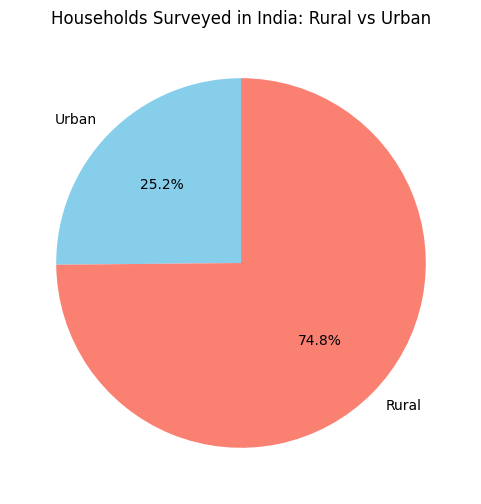

In [12]:
df_india = df[(df['States/UTs'] == "India") & (df['Area'].isin(["Rural","Urban"]))]

values = df_india['Number of Households surveyed']
labels = df_india['Area']

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon'])
plt.title("Households Surveyed in India: Rural vs Urban")
plt.show()

C:\Users\Gokul\AppData\Local\Temp\ipykernel_27912\2663709046.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_women = int(df_india[df_india['Area'] == 'Total']["Number of Women age 15-49 years interviewed"])
C:\Users\Gokul\AppData\Local\Temp\ipykernel_27912\2663709046.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_men   = int(df_india[df_india['Area'] == 'Total']["Number of Men age 15-54 years interviewed"])
C:\Users\Gokul\AppData\Local\Temp\ipykernel_27912\2663709046.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  rural_women = int(df_india[df_india['Area'] == 'Rural']["Number of Women age 15-49 years interviewed"])
C:\Users\Gokul\AppData\Local\Temp\ipykernel_27912\2663709046.py:9:

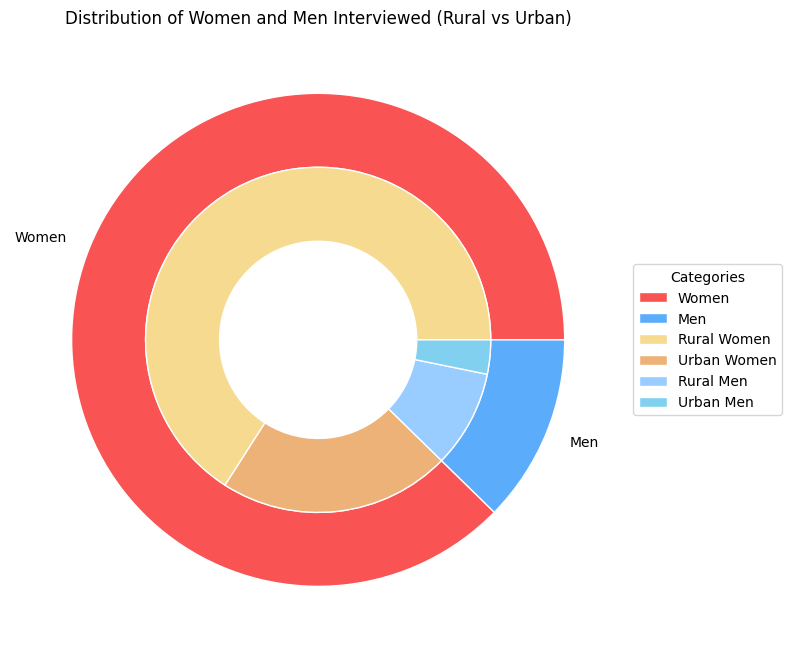

In [13]:
import matplotlib.pyplot as plt

df_india = df[(df['States/UTs'] == "India") & (df['Area'].isin(["Total", "Rural", "Urban"]))]

total_women = int(df_india[df_india['Area'] == 'Total']["Number of Women age 15-49 years interviewed"])
total_men   = int(df_india[df_india['Area'] == 'Total']["Number of Men age 15-54 years interviewed"])

rural_women = int(df_india[df_india['Area'] == 'Rural']["Number of Women age 15-49 years interviewed"])
urban_women = int(df_india[df_india['Area'] == 'Urban']["Number of Women age 15-49 years interviewed"])

rural_men   = int(df_india[df_india['Area'] == 'Rural']["Number of Men age 15-54 years interviewed"])
urban_men   = int(df_india[df_india['Area'] == 'Urban']["Number of Men age 15-54 years interviewed"])

outer_sizes = [total_women, total_men]
outer_labels = ["Women", "Men"]
outer_colors = ["#f95353", "#5cacfc"]

inner_sizes = [rural_women, urban_women, rural_men, urban_men]
inner_labels = ["Rural Women", "Urban Women", "Rural Men", "Urban Men"]
inner_colors = ["#f5da90", "#edb277", "#99ccff", "#81d0ef"]

fig, ax = plt.subplots(figsize=(8,8))

outer_wedges, _ = ax.pie(
    outer_sizes, labels=outer_labels, colors=outer_colors,
    radius=1, wedgeprops=dict(width=0.3, edgecolor='white')
)

inner_wedges, _ = ax.pie(
    inner_sizes, labels=None, colors=inner_colors,
    radius=0.7, wedgeprops=dict(width=0.3, edgecolor='white')
)

ax.legend(
    outer_wedges + inner_wedges, 
    outer_labels + inner_labels,
    title="Categories",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Distribution of Women and Men Interviewed (Rural vs Urban)")
plt.tight_layout()
plt.show()


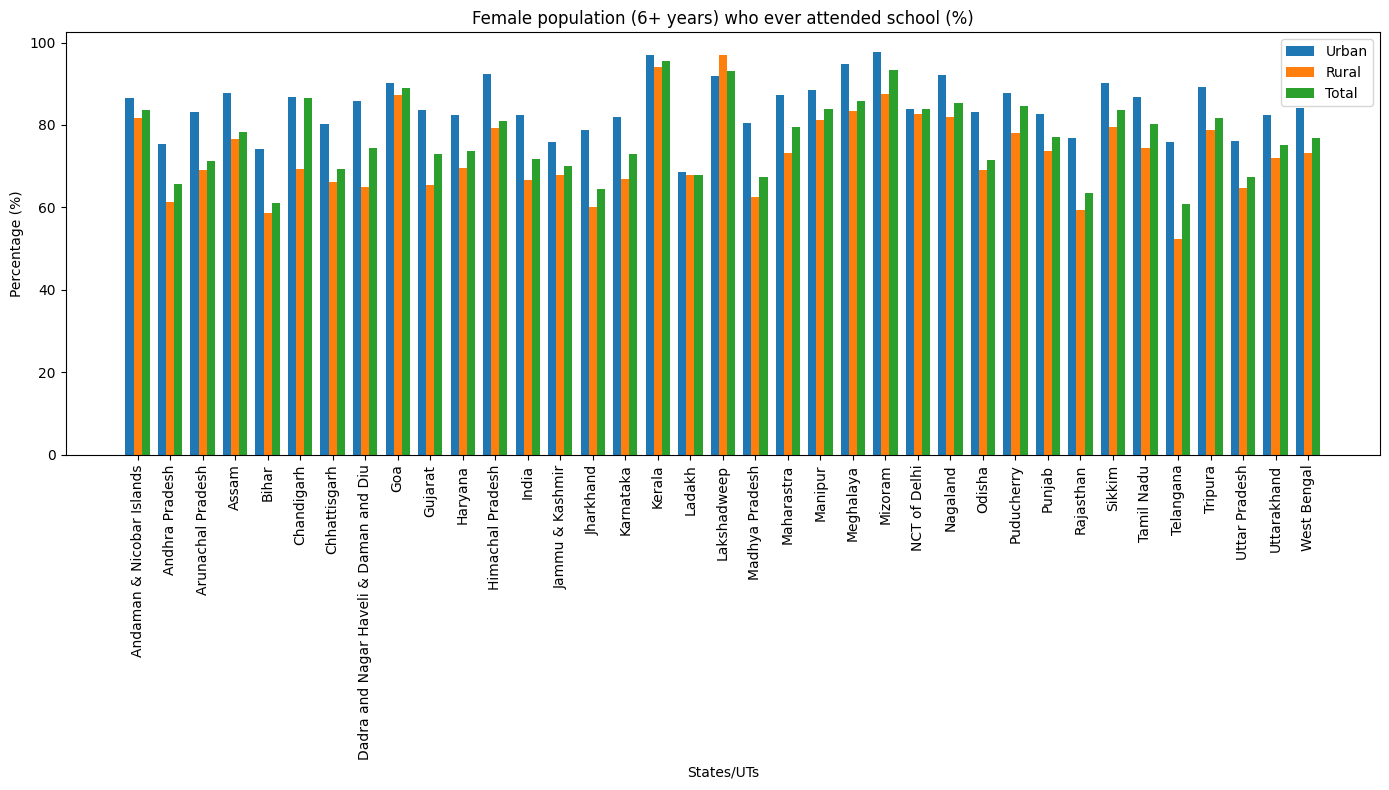

In [14]:
import matplotlib.pyplot as plt
import numpy as np

pivot_df = df.pivot(index="States/UTs", columns="Area", values="Female population age 6 years and above who ever attended school (%)")

pivot_df = pivot_df[["Urban", "Rural", "Total"]]

x = np.arange(len(pivot_df))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(x - width, pivot_df["Urban"], width, label="Urban")
ax.bar(x, pivot_df["Rural"], width, label="Rural")
ax.bar(x + width, pivot_df["Total"], width, label="Total")

ax.set_xlabel("States/UTs")
ax.set_ylabel("Percentage (%)")
ax.set_title("Female population (6+ years) who ever attended school (%)")
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


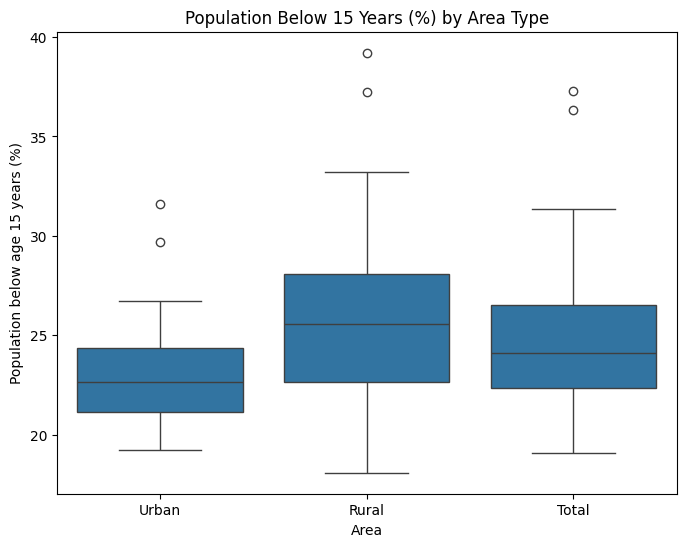

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='Area', y='Population below age 15 years (%)', data=df)
plt.title("Population Below 15 Years (%) by Area Type")
plt.show()

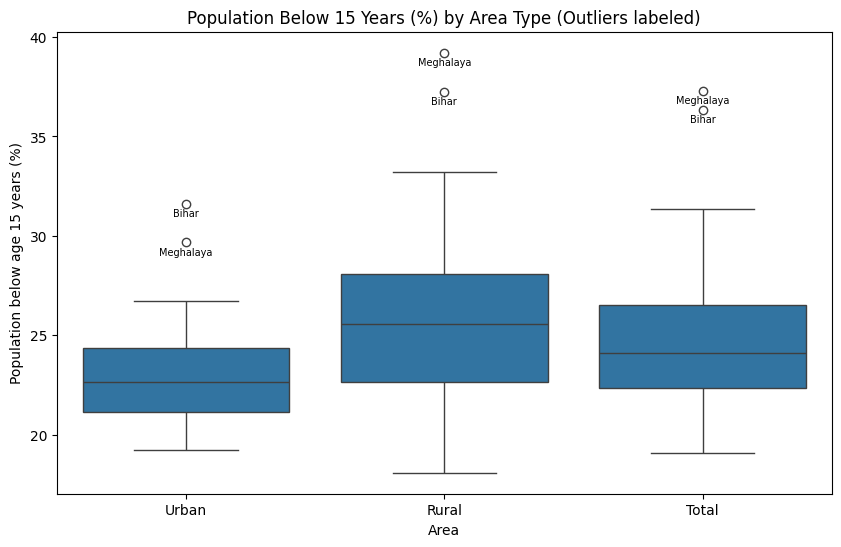

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

col = 'Population below age 15 years (%)'

plt.figure(figsize=(10,6))
sns.boxplot(x='Area', y=col, data=df)

for area in df['Area'].unique():
    subset = df[df['Area'] == area]
    values = subset[col].astype(float)

    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = subset[(values < lower_bound) | (values > upper_bound)]

    for _, row in outliers.iterrows():
        plt.text(
            x = {'Rural':1, 'Urban':0, 'Total':2}[row['Area']],
            y = row[col]-0.75,
            s = row['States/UTs'],
            ha='center',
            va='bottom',
            fontsize=7,
            rotation=0,
            color='black'
        )

plt.title("Population Below 15 Years (%) by Area Type (Outliers labeled)")
plt.show()


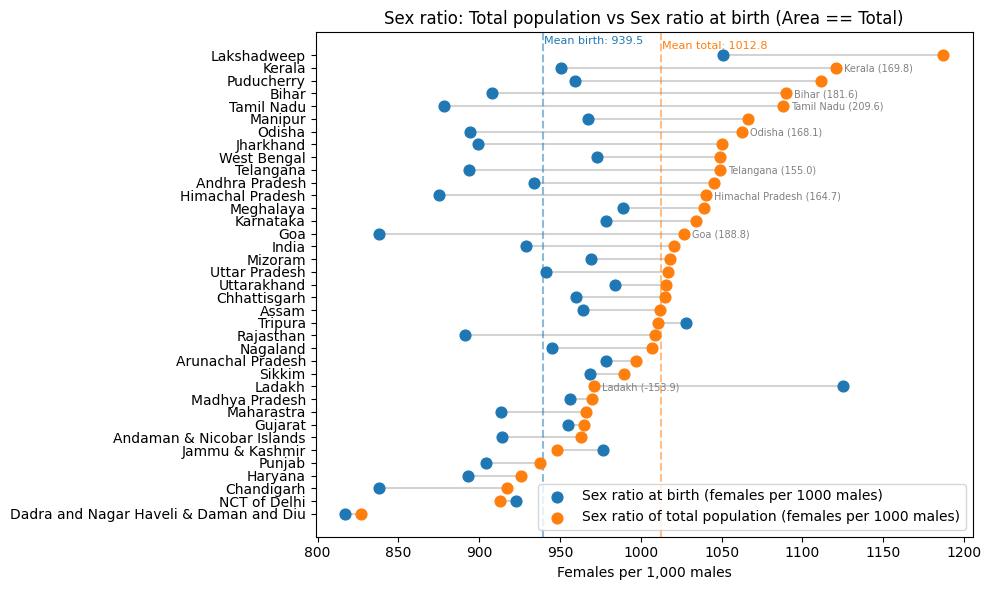

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- find the two matching columns robustly (handles small name differences / leading spaces) ---
col_total = next(c for c in df.columns if 'Sex ratio of the total population' in c)
col_birth = next(c for c in df.columns if 'Sex ratio at birth' in c)

# Filter to Area == 'Total' (robust to spaces/case)
df_total = df[df['Area'].astype(str).str.strip().str.lower() == 'total'].copy()

# convert to numeric, coerce errors to NaN
df_total[col_total] = pd.to_numeric(df_total[col_total], errors='coerce')
df_total[col_birth] = pd.to_numeric(df_total[col_birth], errors='coerce')

# drop rows missing either value
df_total = df_total.dropna(subset=[col_total, col_birth])

# sort by total population sex ratio for nicer ordering (you can change to col_birth if preferred)
df_total = df_total.sort_values(by=col_total, ascending=False).reset_index(drop=True)

# compute a helpful gap metric and pick top states to annotate
df_total['gap'] = df_total[col_total] - df_total[col_birth]
top_gaps = df_total.reindex(df_total['gap'].abs().sort_values(ascending=False).index).head(8)

# plotting
fig, ax = plt.subplots(figsize=(10, max(6, len(df_total)*0.15)))  # height scales with number of states

y = np.arange(len(df_total))

# gray connecting lines
ax.hlines(y, df_total[col_birth], df_total[col_total], color='lightgray', linewidth=1.5, zorder=1)

# markers
ax.scatter(df_total[col_birth], y, color='#1f77b4', s=60, label='Sex ratio at birth (females per 1000 males)', zorder=2)
ax.scatter(df_total[col_total], y, color='#ff7f0e', s=60, label='Sex ratio of total population (females per 1000 males)', zorder=3)

# Y labels = state names
ax.set_yticks(y)
ax.set_yticklabels(df_total['States/UTs'])
ax.invert_yaxis()  # highest on top

# axis labels / title / legend
ax.set_xlabel('Females per 1,000 males')
ax.set_title('Sex ratio: Total population vs Sex ratio at birth (Area == Total)')
ax.legend(loc='lower right')

for _, row in top_gaps.iterrows():
    idx = int(row.name)
    ax.text(row[col_total] + 5, idx + 0.06, f"{row['States/UTs']} ({row['gap']:.1f})", va='center', fontsize=7, color='gray')

# optional vertical reference lines
mean_total = df_total[col_total].mean()
mean_birth = df_total[col_birth].mean()
ax.axvline(mean_total, color='#ff7f0e', linestyle='--', alpha=0.5)
ax.axvline(mean_birth, color='#1f77b4', linestyle='--', alpha=0.5)
ax.text(mean_total + 0.5, -0.5, f"Mean total: {mean_total:.1f}", color='#ff7f0e', fontsize=8)
ax.text(mean_birth + 0.5, -0.9, f"Mean birth: {mean_birth:.1f}", color='#1f77b4', fontsize=8)

plt.tight_layout()
plt.show()


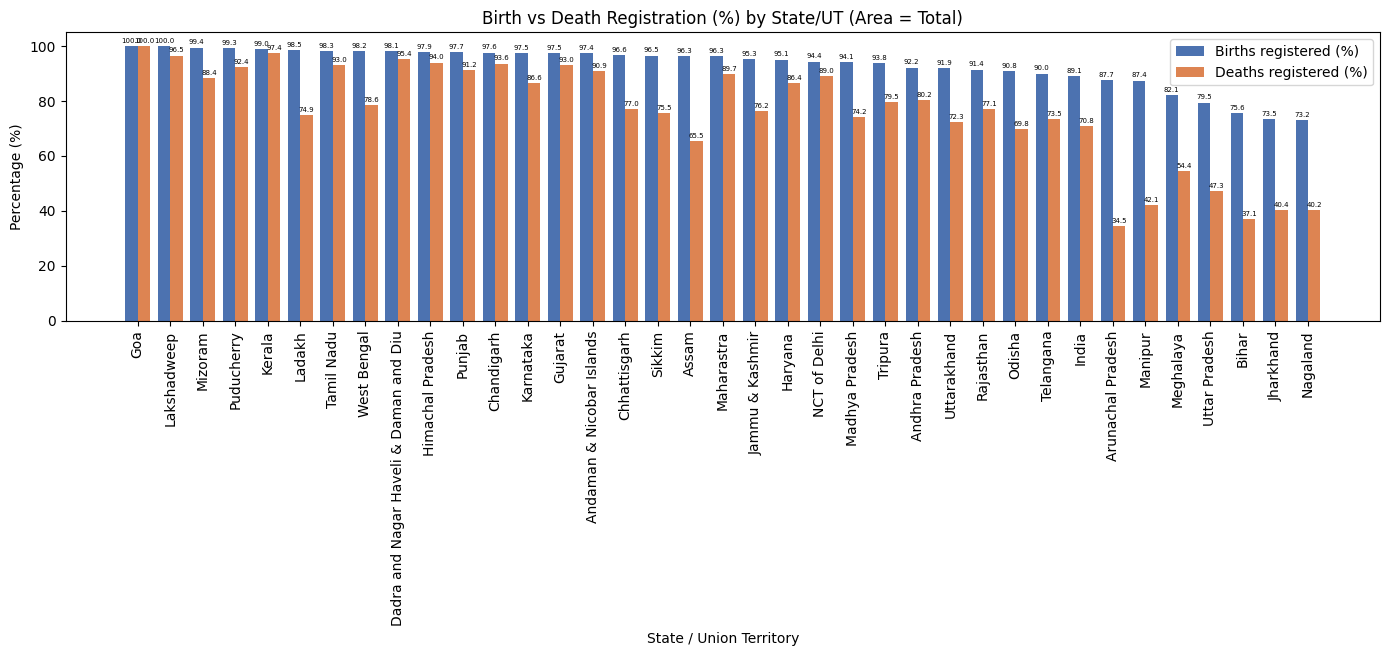

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- configure these if your column names differ slightly ---
col_birth_reg = next(c for c in df.columns if 'Children under age 5 years whose birth was registered' in c)
col_death_reg = next(c for c in df.columns if 'Deaths in the last 3 years registered' in c)

# Prepare a working DF filtered to Area == 'Total'
plot_df = df[df['Area'].astype(str).str.strip().str.lower() == 'total'][['States/UTs', col_birth_reg, col_death_reg]].copy()
plot_df.columns = ['State', 'birth_reg_pct', 'death_reg_pct']

# Clean text: remove '*' and surrounding parentheses and commas, then coerce to numeric
plot_df.replace('*', np.nan, inplace=True)
plot_df['birth_reg_pct'] = plot_df['birth_reg_pct'].astype(str).str.replace(r'^\(|\)$', '', regex=True).str.replace(',', '', regex=False)
plot_df['death_reg_pct'] = plot_df['death_reg_pct'].astype(str).str.replace(r'^\(|\)$', '', regex=True).str.replace(',', '', regex=False)
plot_df['birth_reg_pct'] = pd.to_numeric(plot_df['birth_reg_pct'], errors='coerce')
plot_df['death_reg_pct'] = pd.to_numeric(plot_df['death_reg_pct'], errors='coerce')

# Drop rows where both are missing
plot_df = plot_df.dropna(subset=['birth_reg_pct','death_reg_pct'], how='all').reset_index(drop=True)

# Optional: sort by birth registration (comment out if you want original order)
plot_df = plot_df.sort_values('birth_reg_pct', ascending=False).reset_index(drop=True)

# Plot settings
states = plot_df['State']
x = np.arange(len(states))
width = 0.38

fig, ax = plt.subplots(figsize=(14, max(6, len(states)*0.18)))

bars1 = ax.bar(x - width/2, plot_df['birth_reg_pct'], width, label='Births registered (%)', color='#4c72b0')
bars2 = ax.bar(x + width/2, plot_df['death_reg_pct'], width, label='Deaths registered (%)', color='#dd8452')

# Add value labels on top of bars (small font)
def autolabel(bars):
    for bar in bars:
        h = bar.get_height()
        if np.isnan(h):
            continue
        ax.text(bar.get_x() + bar.get_width()/2, h + 0.8, f'{h:.1f}', ha='center', va='bottom', fontsize=5)

autolabel(bars1)
autolabel(bars2)

# Labels, ticks, legend
ax.set_xlabel('State / Union Territory')
ax.set_ylabel('Percentage (%)')
ax.set_title('Birth vs Death Registration (%) by State/UT (Area = Total)')
ax.set_xticks(x)
ax.set_xticklabels(states, rotation=90, ha='center')
ax.legend()

plt.tight_layout()
plt.show()


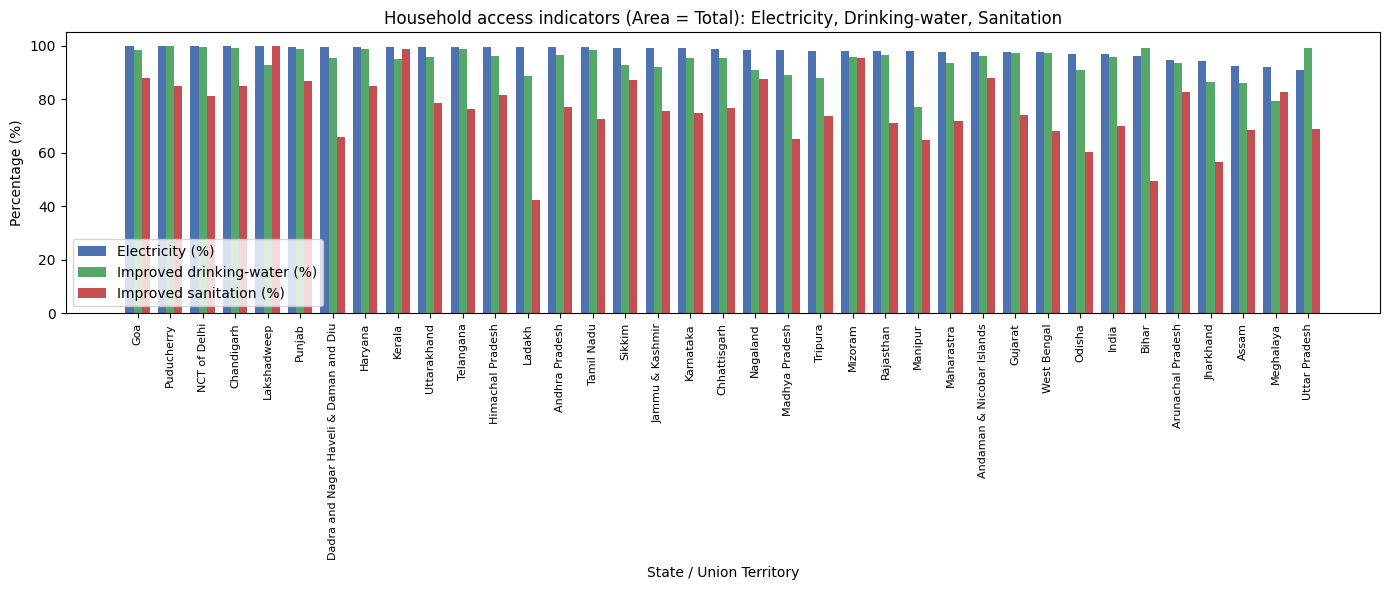

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- robust column lookup (change substrings if your headers differ) ---
col_elec = next(c for c in df.columns if 'Population living in households with electricity' in c)
col_water = next(c for c in df.columns if 'Population living in households with an improved drinking-water source' in c)
col_san = next(c for c in df.columns if 'Population living in households that use an improved sanitation facility' in c)

cols = [col_elec, col_water, col_san]

# Prepare dataframe for Area == 'Total'
work = df[df['Area'].astype(str).str.strip().str.lower() == 'total'][['States/UTs'] + cols].copy()
work = work.rename(columns={cols[0]: 'electricity_pct', cols[1]: 'water_pct', cols[2]: 'sanitation_pct'})

# Clean the three columns: remove '*', surrounding parentheses, commas; coerce to numeric
for c in ['electricity_pct','water_pct','sanitation_pct']:
    work[c] = work[c].astype(str).str.strip().replace({'*': np.nan})
    work[c] = work[c].str.replace(r'^\(|\)$', '', regex=True)  # drop surrounding parentheses
    work[c] = work[c].str.replace(',', '', regex=False)         # drop commas if any
    work[c] = pd.to_numeric(work[c], errors='coerce')

# Optional: drop rows where all three are missing
work = work.dropna(subset=['electricity_pct','water_pct','sanitation_pct'], how='all').reset_index(drop=True)

# Optional: sort states by electricity_pct (change to 'water_pct' or 'sanitation_pct' if you prefer)
work = work.sort_values('electricity_pct', ascending=False).reset_index(drop=True)

# Plot grouped bar chart
states = work['States/UTs'].tolist()
x = np.arange(len(states))
width = 0.25

fig, ax = plt.subplots(figsize=(14, max(6, len(states)*0.16)))

b1 = ax.bar(x - width,  work['electricity_pct'], width, label='Electricity (%)', color='#4c72b0')
b2 = ax.bar(x,          work['water_pct'],       width, label='Improved drinking-water (%)', color='#55a868')
b3 = ax.bar(x + width,  work['sanitation_pct'],  width, label='Improved sanitation (%)', color='#c44e52')

# Add numeric labels on top of bars (small font)
def autolabel(bars, fmt='{:.1f}'):
    for bar in bars:
        h = bar.get_height()
        if np.isnan(h):
            continue

autolabel(b1); autolabel(b2); autolabel(b3)

# Labels and formatting
ax.set_xlabel('State / Union Territory')
ax.set_ylabel('Percentage (%)')
ax.set_title('Household access indicators (Area = Total): Electricity, Drinking-water, Sanitation')
ax.set_xticks(x)
ax.set_xticklabels(states, rotation=90, fontsize=8)
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()


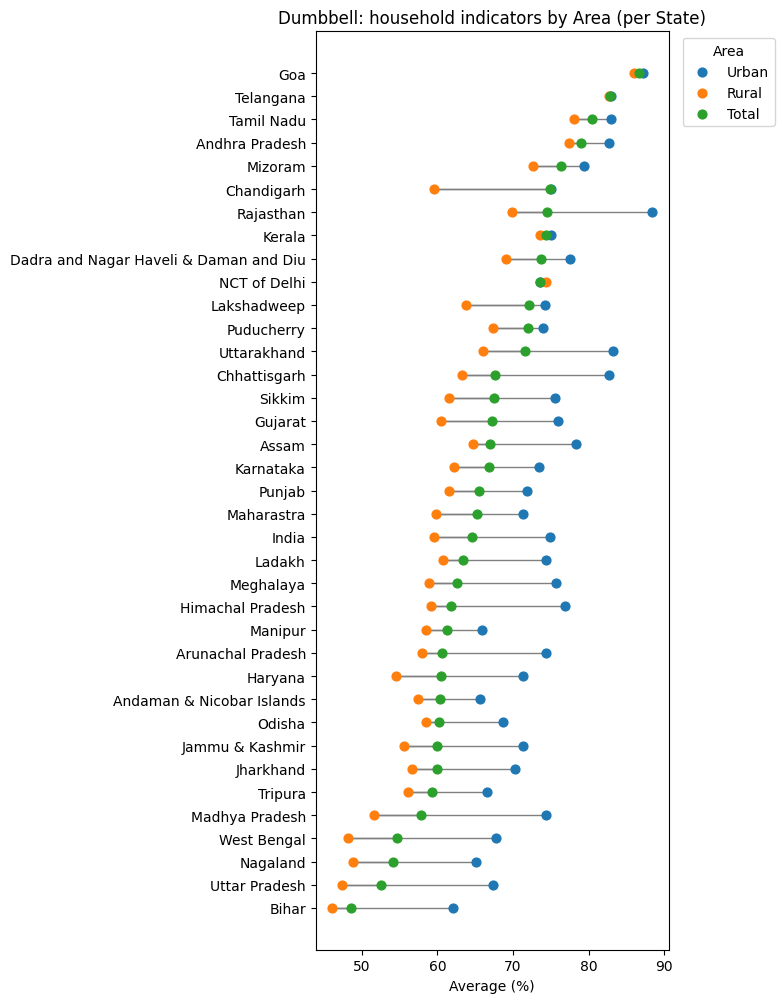

In [20]:
import pandas as pd, numpy as np

c1 = next(c for c in df.columns if 'Households using clean fuel for cooking' in c)
c2 = next(c for c in df.columns if 'Households using iodized salt' in c)
c3 = next(c for c in df.columns if 'Households with any usual member covered under a health insurance' in c)
cols = [c1, c2, c3]

work = df[['States/UTs','Area'] + cols].copy()
for c in cols:
    work[c] = work[c].astype(str).str.strip().replace({'*': np.nan})
    work[c] = work[c].str.replace(r'^\(|\)$', '', regex=True).str.replace(',', '', regex=False)
    work[c] = pd.to_numeric(work[c], errors='coerce')

work['household_ind_avg_pct'] = work[cols].mean(axis=1, skipna=True)

pivot = work.pivot(index='States/UTs', columns='Area', values='household_ind_avg_pct')

area_order = [a for a in ['Urban','Rural','Total'] if a in pivot.columns]
pivot = pivot[area_order]

if 'Total' in pivot.columns:
    pivot = pivot.sort_values('Total', ascending=False)
else:
    pivot = pivot.sort_values(pivot.columns[0], ascending=False)

plot_df = pivot.head(40).reset_index() 
areas = pivot.columns.tolist()         

import numpy as np
fig, ax = plt.subplots(figsize=(8, len(plot_df)*0.22 + 2))

y = np.arange(len(plot_df))
for i, a in enumerate(areas):
    ax.scatter(plot_df[a], y, s=40, label=a if i==0 else "", zorder=3) 

for idx, row in plot_df.iterrows():
    vals = row[areas].values
    ax.plot(vals, [idx]*len(vals), color='gray', linewidth=1, zorder=1)

ax.set_yticks(y)
ax.set_yticklabels(plot_df['States/UTs'])
ax.invert_yaxis()
ax.set_xlabel("Average (%)")
ax.set_title("Dumbbell: household indicators by Area (per State)")
ax.legend(areas, title='Area', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

C:\Users\Gokul\AppData\Local\Temp\ipykernel_27912\2528113051.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


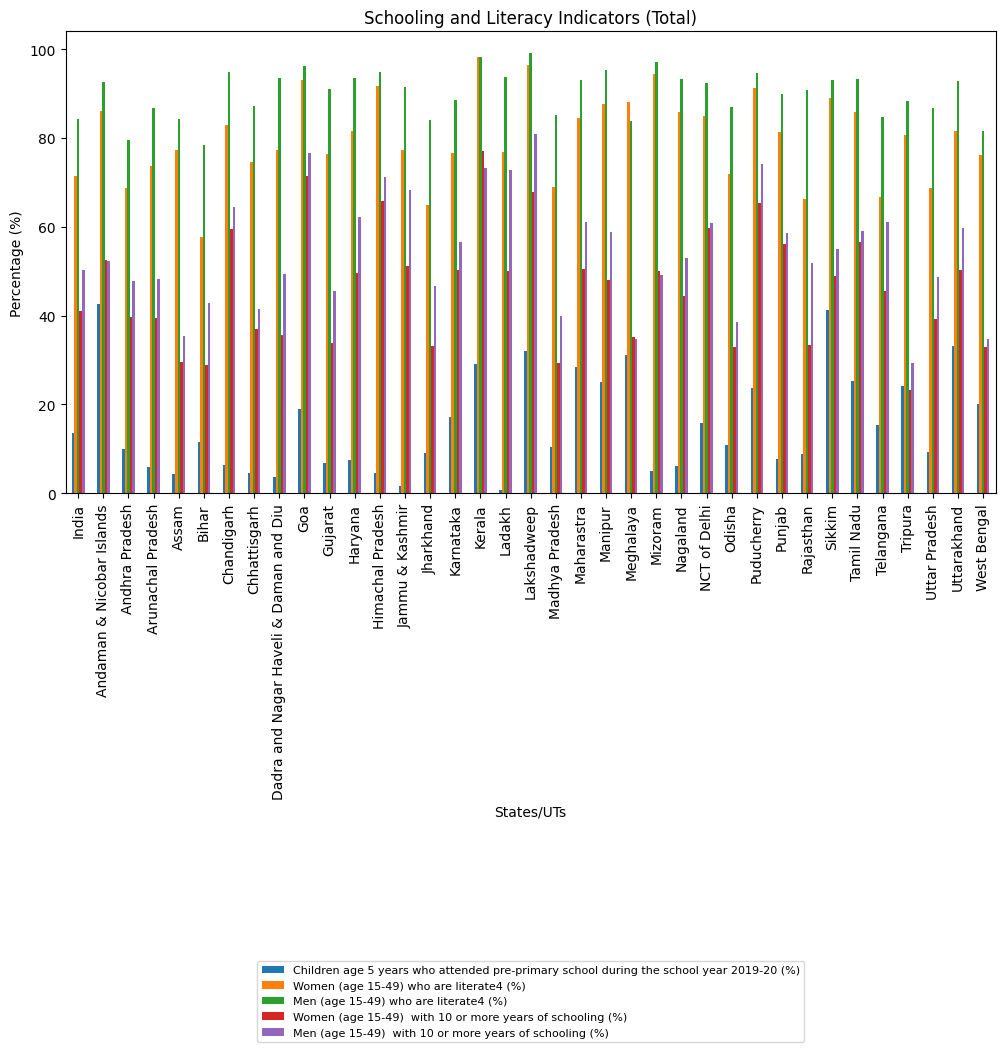

In [21]:
import matplotlib.pyplot as plt

cols = [
    'Children age 5 years who attended pre-primary school during the school year 2019-20 (%)',
    'Women (age 15-49) who are literate4 (%)',
    'Men (age 15-49) who are literate4 (%)',
    'Women (age 15-49)  with 10 or more years of schooling (%)',
    'Men (age 15-49)  with 10 or more years of schooling (%)'
]

df_total = df[df['Area'] == 'Total'][['States/UTs'] + cols]

df_total.set_index('States/UTs', inplace=True)

df_total.plot(kind='bar', figsize=(12,6))
plt.title("Schooling and Literacy Indicators (Total)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=90)
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -1),  # shift legend further down
    ncol=1,
    fontsize=8
)
plt.tight_layout()
plt.show()

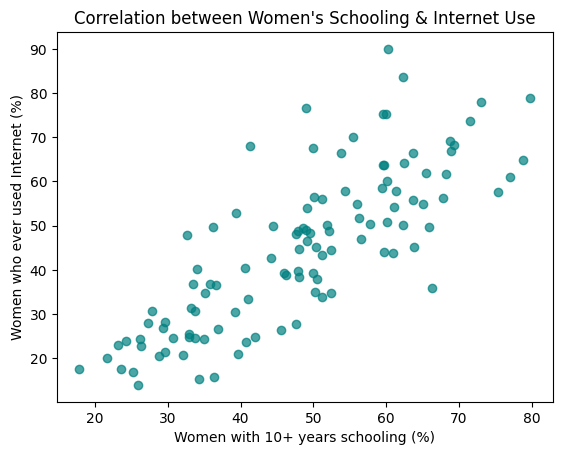

In [22]:
import matplotlib.pyplot as plt

plt.scatter(df["Women (age 15-49)  with 10 or more years of schooling (%)"], 
            df["Women (age 15-49)  who have ever used the internet (%)"], 
            color="teal", alpha=0.7)

plt.xlabel("Women with 10+ years schooling (%)")
plt.ylabel("Women who ever used Internet (%)")
plt.title("Correlation between Women's Schooling & Internet Use")

plt.show()

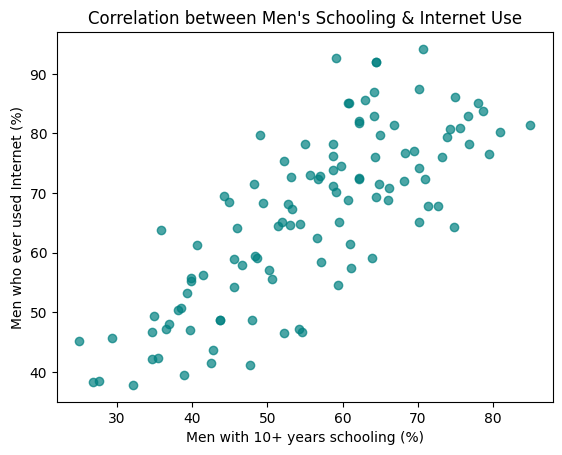

In [23]:
import matplotlib.pyplot as plt

plt.scatter(df["Men (age 15-49)  with 10 or more years of schooling (%)"], 
            df["Men (age 15-49)  who have ever used the internet (%)"], 
            color="teal", alpha=0.7)

plt.xlabel("Men with 10+ years schooling (%)")
plt.ylabel("Men who ever used Internet (%)")
plt.title("Correlation between Men's Schooling & Internet Use")

plt.show()

C:\Users\Gokul\AppData\Local\Temp\ipykernel_27912\1484166584.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['FamilyPlanning_Mean'] = df[family_planning_cols].mean(axis=1, skipna=True)
C:\Users\Gokul\AppData\Local\Temp\ipykernel_27912\1484166584.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Education_Mean'] = df[education_cols].mean(axis=1, skipna=True)


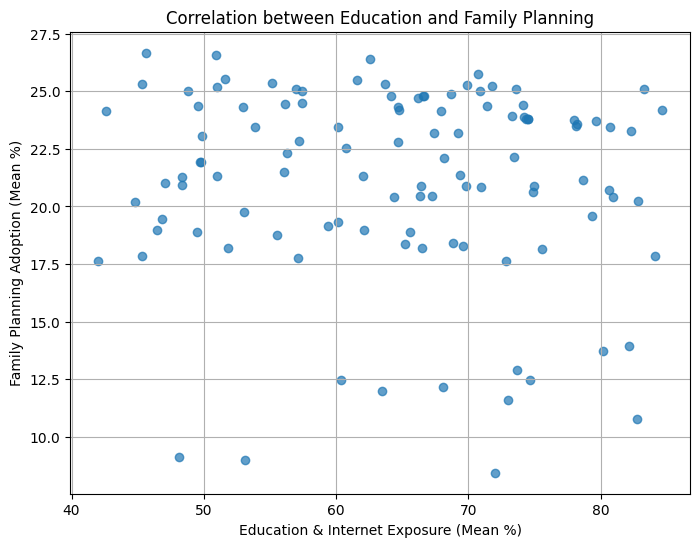

In [24]:
import matplotlib.pyplot as plt

# Define column groups
family_planning_cols = [
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any method6 (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any modern method6 (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Female sterilization (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Male sterilization (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - IUD/PPIUD (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Pill (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Condom (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Injectables (%)'
]

education_cols = [
    'Women (age 15-49) who are literate4 (%)',
    'Men (age 15-49) who are literate4 (%)',
    'Women (age 15-49)  with 10 or more years of schooling (%)',
    'Men (age 15-49)  with 10 or more years of schooling (%)',
    'Women (age 15-49)  who have ever used the internet (%)',
    'Men (age 15-49)  who have ever used the internet (%)'
]

# Calculate mean for each category
df['FamilyPlanning_Mean'] = df[family_planning_cols].mean(axis=1, skipna=True)
df['Education_Mean'] = df[education_cols].mean(axis=1, skipna=True)

# Scatterplot to see correlation
plt.figure(figsize=(8,6))
plt.scatter(df['Education_Mean'], df['FamilyPlanning_Mean'], alpha=0.7)
plt.xlabel("Education & Internet Exposure (Mean %)")
plt.ylabel("Family Planning Adoption (Mean %)")
plt.title("Correlation between Education and Family Planning")
plt.grid(True)
plt.show()


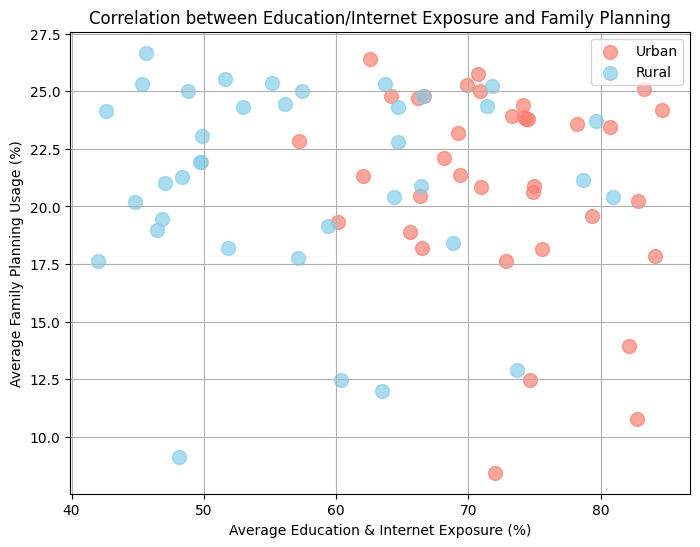

In [25]:
# Filter out the 'Total' row
df_plot = df[df['Area'].isin(['Rural', 'Urban'])]

df['FamilyPlanning_Mean'] = df[family_planning_cols].mean(axis=1)
df['Education_Mean'] = df[education_cols].mean(axis=1)

# Plotting
colors = {'Rural': 'skyblue', 'Urban': 'salmon'}

plt.figure(figsize=(8,6))
for area in df_plot['Area'].unique():
    subset = df_plot[df_plot['Area'] == area]
    plt.scatter(subset['Education_Mean'], subset['FamilyPlanning_Mean'], 
                color=colors[area], label=area, s=100, alpha=0.7)

plt.xlabel('Average Education & Internet Exposure (%)')
plt.ylabel('Average Family Planning Usage (%)')
plt.title('Correlation between Education/Internet Exposure and Family Planning')
plt.legend()
plt.grid(True)
plt.show()


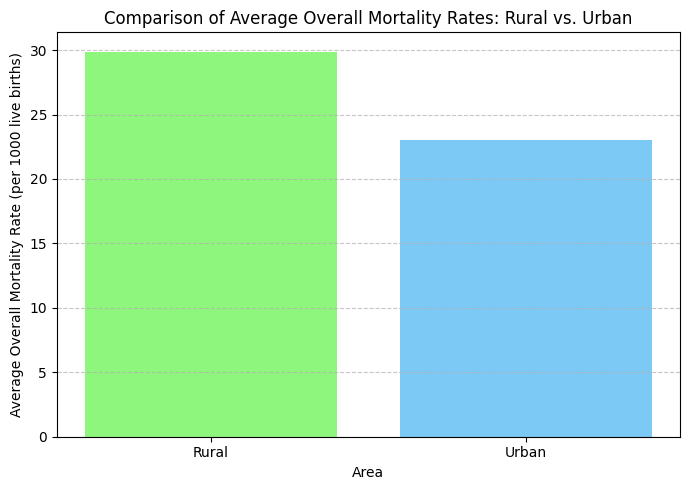

In [26]:
mortality_cols = [
    'Neonatal mortality rate (per 1000 live births)',
    'Infant mortality rate (per 1000 live births)',
    'Under-five mortality rate (per 1000 live births)'
]

# --- Chart 1: Combined Bar Chart for Rural vs Urban Average Mortality ---

# Filter out 'Total' and select only 'Rural' and 'Urban' areas
df_rural_urban = df[df['Area'].isin(['Rural', 'Urban'])].copy()

# Calculate the mean of the three mortality columns for each row
df_rural_urban['Overall Mortality Mean'] = df_rural_urban[mortality_cols].mean(axis=1)

# Group by Area and calculate the mean of the 'Overall Mortality Mean'
df_combined_mortality = df_rural_urban.groupby('Area')['Overall Mortality Mean'].mean()

# Define consistent colors for the plots
colors_area = {'Rural': "#8ff67d", 'Urban': "#7dc9f5"} # Green for Rural, Blue for Urban

# Create a single bar chart for Rural vs Urban
plt.figure(figsize=(7, 5)) # Adjusted figure size for a single chart
plt.bar(df_combined_mortality.index, df_combined_mortality.values,
        color=[colors_area[area] for area in df_combined_mortality.index])
plt.xlabel('Area')
plt.ylabel('Average Overall Mortality Rate (per 1000 live births)')
plt.title('Comparison of Average Overall Mortality Rates: Rural vs. Urban')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

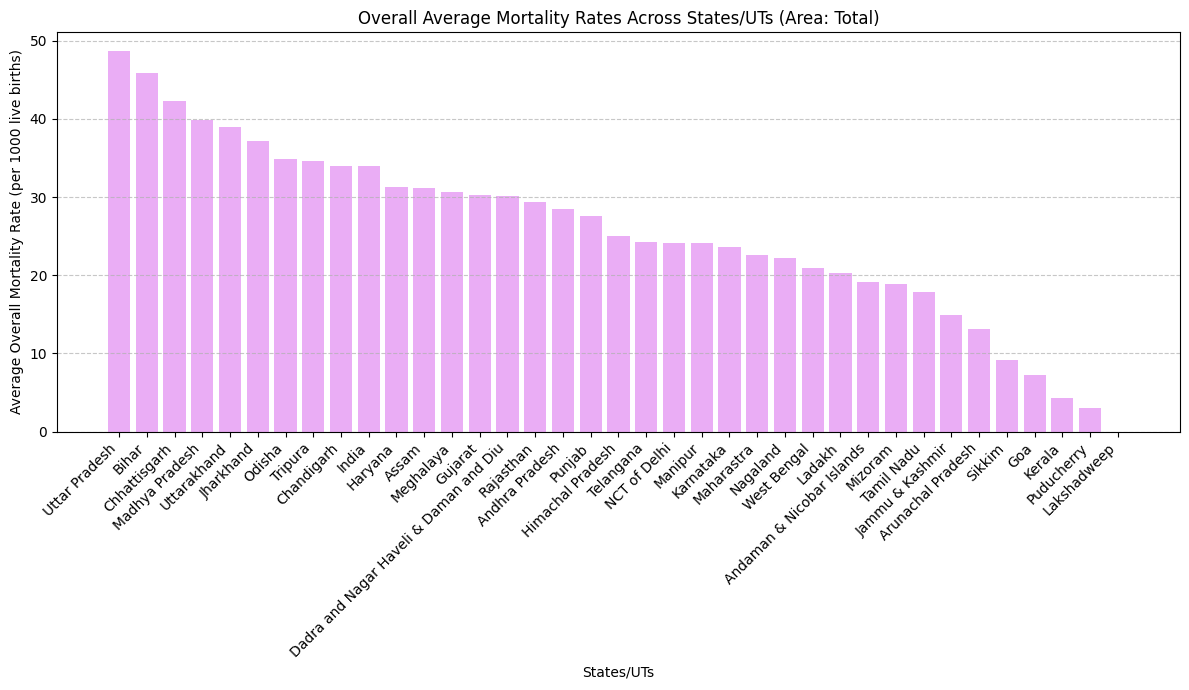

In [27]:
# Filter the DataFrame for Area == 'Total'
df_total_states = df[df['Area'] == 'Total'].copy()

# Calculate the mean of the three mortality columns for each state
df_total_states['Overall Mortality Mean'] = df_total_states[mortality_cols].mean(axis=1)

# Sort the states by their overall mortality mean for better visualization
df_total_states_sorted = df_total_states.sort_values(by='Overall Mortality Mean', ascending=False)

plt.figure(figsize=(12, 7)) # Adjusted figure size for state-wise plots
plt.bar(df_total_states_sorted['States/UTs'], df_total_states_sorted['Overall Mortality Mean'], color="#eaadf5") # Gray color for combined states plot
plt.xlabel('States/UTs')
plt.ylabel('Average Overall Mortality Rate (per 1000 live births)')
plt.title('Overall Average Mortality Rates Across States/UTs (Area: Total)')
plt.xticks(rotation=45, ha='right') # Rotate state names for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

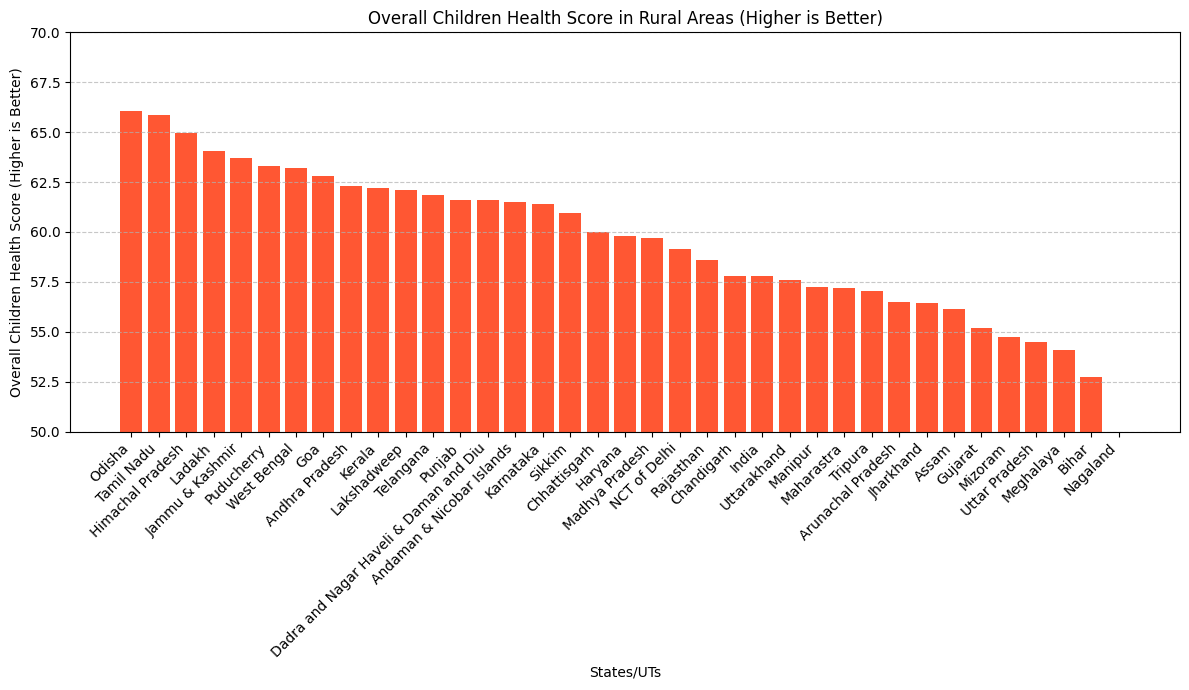

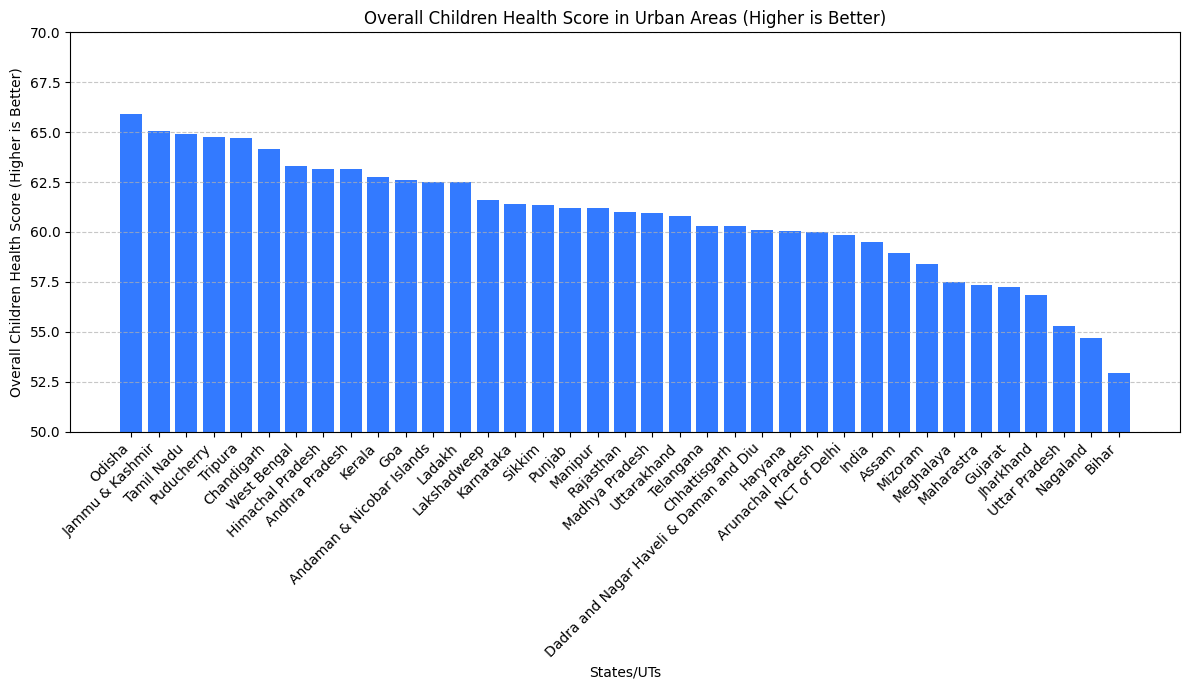

In [28]:
children_health_cols_higher_is_better = [
    'Children born at home who were taken to a health facility for a check-up within 24 hours of birth (for last birth in the 5 years before the survey} (%)',
    'Children who received postnatal care from a doctor/nurse/LHV/ANM/midwife/ other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)',
    'Institutional births (in the 5 years before the survey) (%)',
    'Institutional births in public facility (in the 5 years before the survey) (%)',
    'Home births that were conducted by skilled health personnel  (in the 5 years before the survey)10 (%)',
    'Births attended by skilled health personnel (in the 5 years before the survey)10 (%)',
    'Births delivered by caesarean section (in the 5 years before the survey) (%)',
    'Births in a private health facility that were delivered by caesarean section (in the 5 years before the survey) (%)',
    'Births in a public health facility that were delivered by caesarean section (in the 5 years before the survey) (%)',
    "Children age 12-23 months fully vaccinated based on information from either vaccination card or mother's recall11 (%)",
    'Children age 12-23 months fully vaccinated based on information from vaccination card only12 (%)',
    'Children age 12-23 months who have received BCG (%)',
    'Children age 12-23 months who have received 3 doses of polio vaccine13 (%)',
    'Children age 12-23 months who have received 3 doses of penta or DPT vaccine (%)',
    'Children age 12-23 months who have received the first dose of measles-containing vaccine (MCV) (%)',
    'Children age 24-35 months who have received a second dose of measles-containing vaccine (MCV) (%)',
    'Children age 12-23 months who have received 3 doses of rotavirus vaccine14 (%)',
    'Children age 12-23 months who have received 3 doses of penta or hepatitis B vaccine (%)',
    'Children age 9-35 months who received a vitamin A dose in the last 6 months (%)',
    'Children age 12-23 months who received most of their vaccinations in a public health facility (%)',
    'Children age 12-23 months who received most of their vaccinations in a private health facility (%)',
    'Children with diarrhoea in the 2 weeks preceding the survey who received oral rehydration salts (ORS) (Children under age 5 years) (%) ',
    'Children with diarrhoea in the 2 weeks preceding the survey who received zinc (Children under age 5 years) (%) ',
    'Children swith diarrhoea in the 2 weeks preceding the survey taken to a health facility or health provider (Children under age 5 years) (%) ',
    'Children with fever or symptoms of ARI in the 2 weeks preceding the survey taken to a health facility or health provider (Children under age 5 years) (%) ',
    'Children under age 3 years breastfed within one hour of birth15 (%)',
    'Children under age 6 months exclusively breastfed16 (%)',
    'Children age 6-8 months receiving solid or semi-solid food and breastmilk16 (%)',
    'Breastfeeding children age 6-23 months receiving an adequate diet16, 17  (%)',
    'Non-breastfeeding children age 6-23 months receiving an adequate diet16, 17 (%)',
    'Total children age 6-23 months receiving an adequate diet16, 17  (%)'
]

children_health_cols_lower_is_better = [
    'Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%) ',
    'Children Prevalence of symptoms of acute respiratory infection (ARI) in the 2 weeks preceding the survey (Children under age 5 years) (%) ',
    'Children under 5 years who are stunted (height-for-age)18 (%)',
    'Children under 5 years who are wasted (weight-for-height)18 (%)',
    'Children under 5 years who are severely wasted (weight-for-height)19 (%)',
    'Children under 5 years who are underweight (weight-for-age)18 (%)',
    'Children under 5 years who are overweight (weight-for-height)20 (%)',
    'Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)'
]

# --- Chart: Children Health Score for Rural vs Urban States/UTs ---

# Filter out 'Total' and select only 'Rural' and 'Urban' areas for children health
df_children_health = df[df['Area'].isin(['Rural', 'Urban'])].copy()

# Apply transformations based on "higher is better" or "lower is better"
transformed_children_health_df = pd.DataFrame(index=df_children_health.index)

for col in children_health_cols_higher_is_better:
    if col in df_children_health.columns:
        transformed_children_health_df[col] = df_children_health[col]
    else:
        # Using a default value (e.g., 0 or NaN) or handle missing columns as needed
        # For simplicity, if a column is missing, it won't contribute to the mean.
        # print(f"Warning: Column '{col}' not found in DataFrame for 'higher is better' group. Skipping.")
        pass

for col in children_health_cols_lower_is_better:
    if col in df_children_health.columns:
        # Subtract from 100 to flip the scale: lower original value means higher "better" score
        transformed_children_health_df[col] = 100 - df_children_health[col]
    else:
        # print(f"Warning: Column '{col}' not found in DataFrame for 'lower is better' group. Skipping.")
        pass

# Calculate the overall mean health score for children
# Only consider columns that actually exist after transformation
existing_transformed_cols = [col for col in transformed_children_health_df.columns if col in df_children_health.columns]
if not existing_transformed_cols:
    print("No children health columns found or correctly transformed in the DataFrame. Cannot calculate health score.")
else:
    df_children_health['Overall Children Health Score'] = transformed_children_health_df[existing_transformed_cols].mean(axis=1)

    # Prepare data for plotting
    rural_children_health = df_children_health[df_children_health['Area'] == 'Rural'].sort_values(by='Overall Children Health Score', ascending=False)
    urban_children_health = df_children_health[df_children_health['Area'] == 'Urban'].sort_values(by='Overall Children Health Score', ascending=False)

    # Plot for Rural Areas - Overall Children Health Score
    plt.figure(figsize=(12, 7))
    plt.bar(rural_children_health['States/UTs'], rural_children_health['Overall Children Health Score'], color='#FF5733') # A distinct color for children's health
    plt.xlabel('States/UTs')
    plt.ylabel('Overall Children Health Score (Higher is Better)')
    plt.title('Overall Children Health Score in Rural Areas (Higher is Better)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(50, 70) # Set y-axis limit from 50 to 70
    plt.tight_layout()
    plt.show()

    # Plot for Urban Areas - Overall Children Health Score
    plt.figure(figsize=(12, 7))
    plt.bar(urban_children_health['States/UTs'], urban_children_health['Overall Children Health Score'], color='#337AFF') # Another distinct color
    plt.xlabel('States/UTs')
    plt.ylabel('Overall Children Health Score (Higher is Better)')
    plt.title('Overall Children Health Score in Urban Areas (Higher is Better)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(50, 70) # Set y-axis limit from 50 to 70
    plt.tight_layout()
    plt.show()



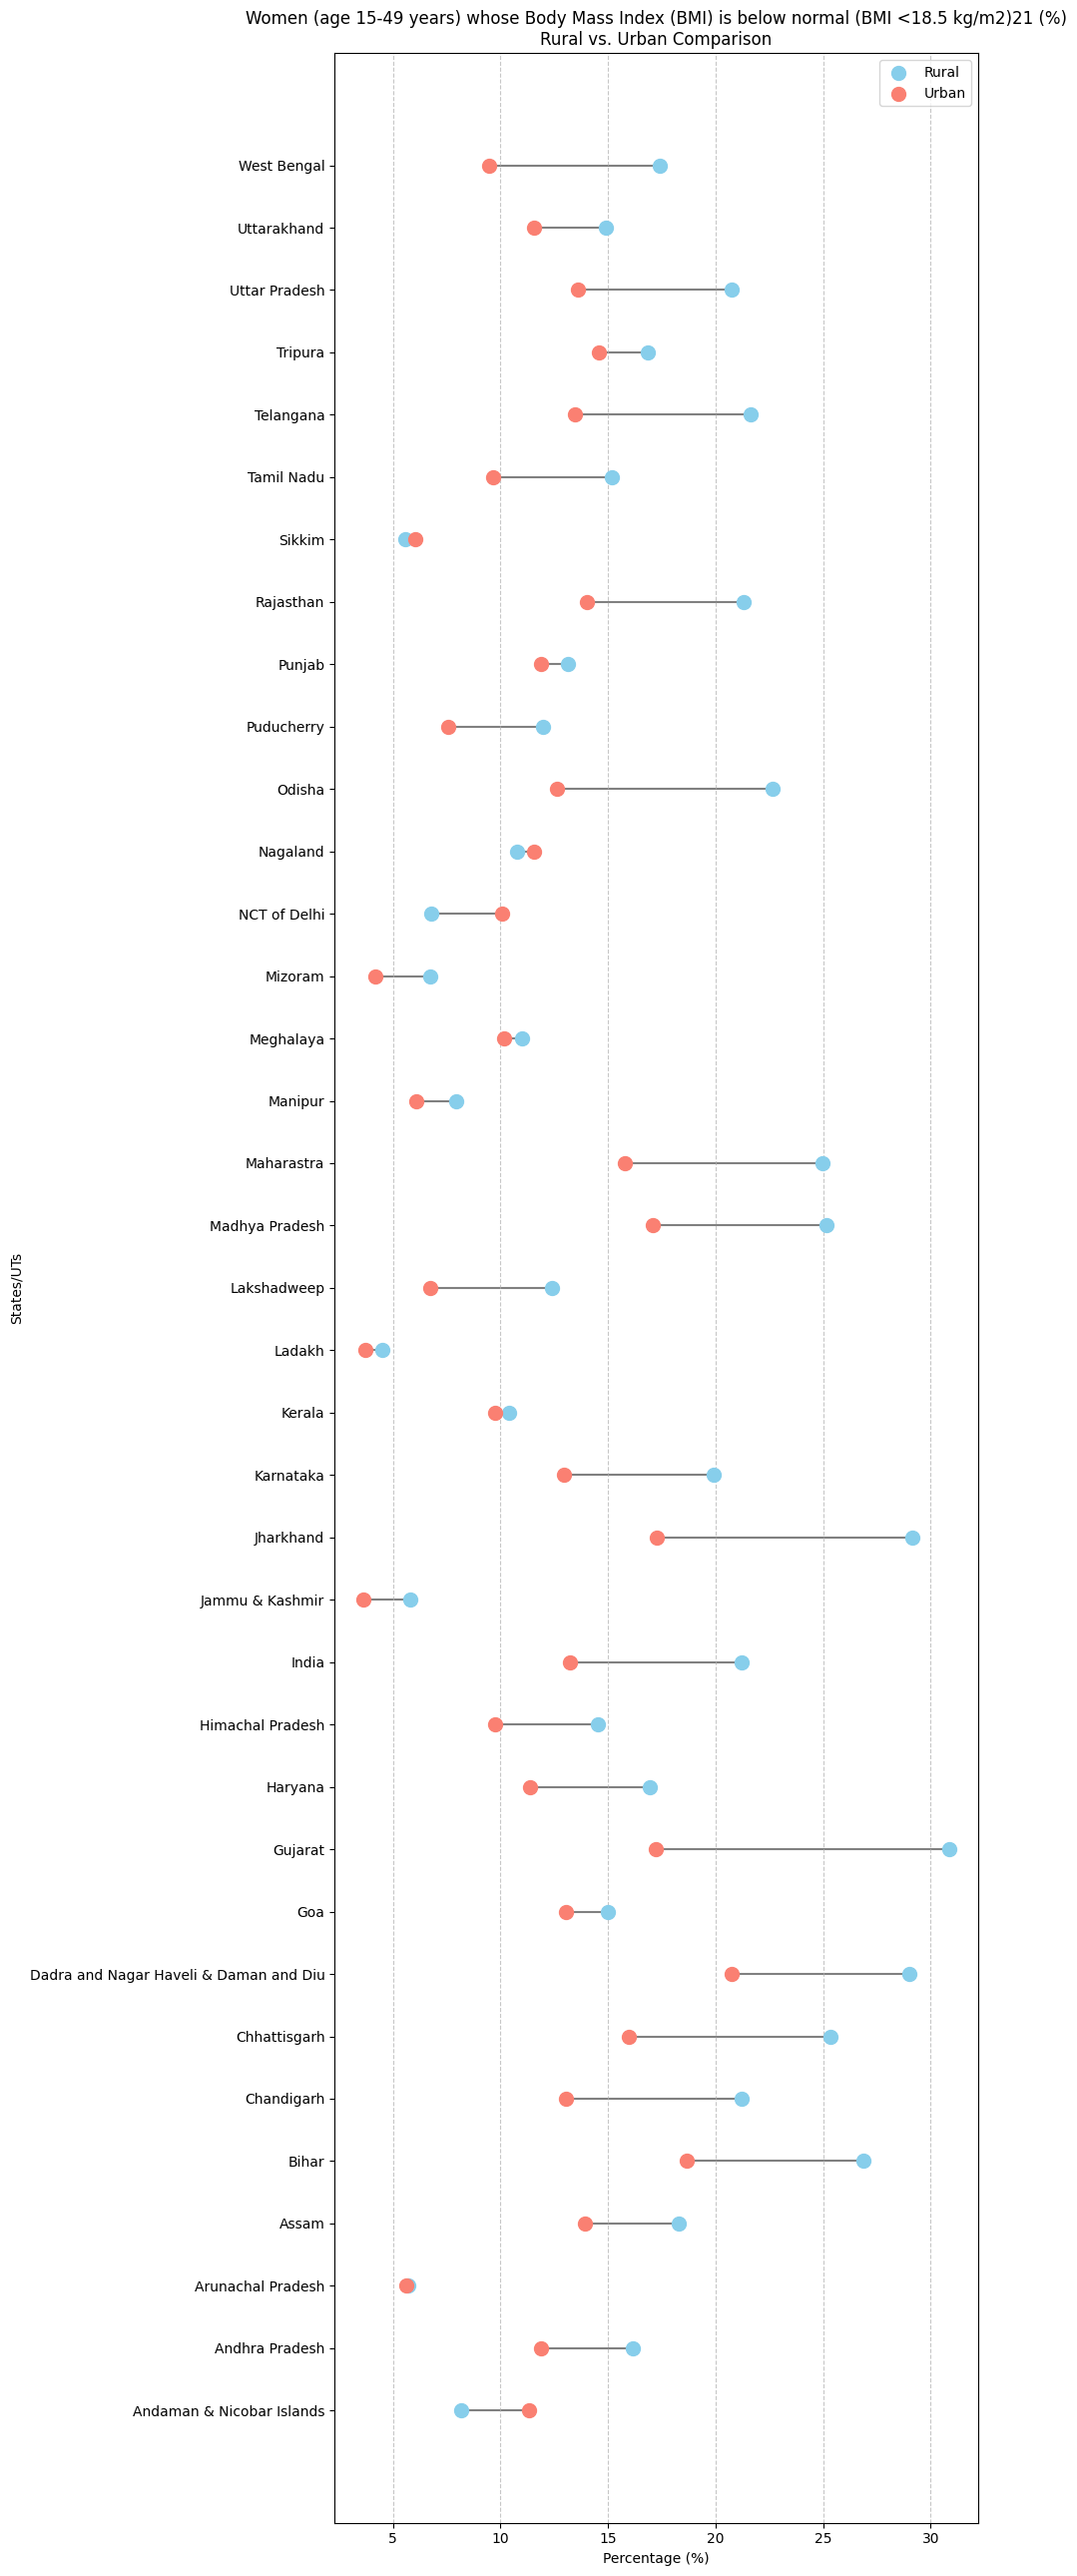

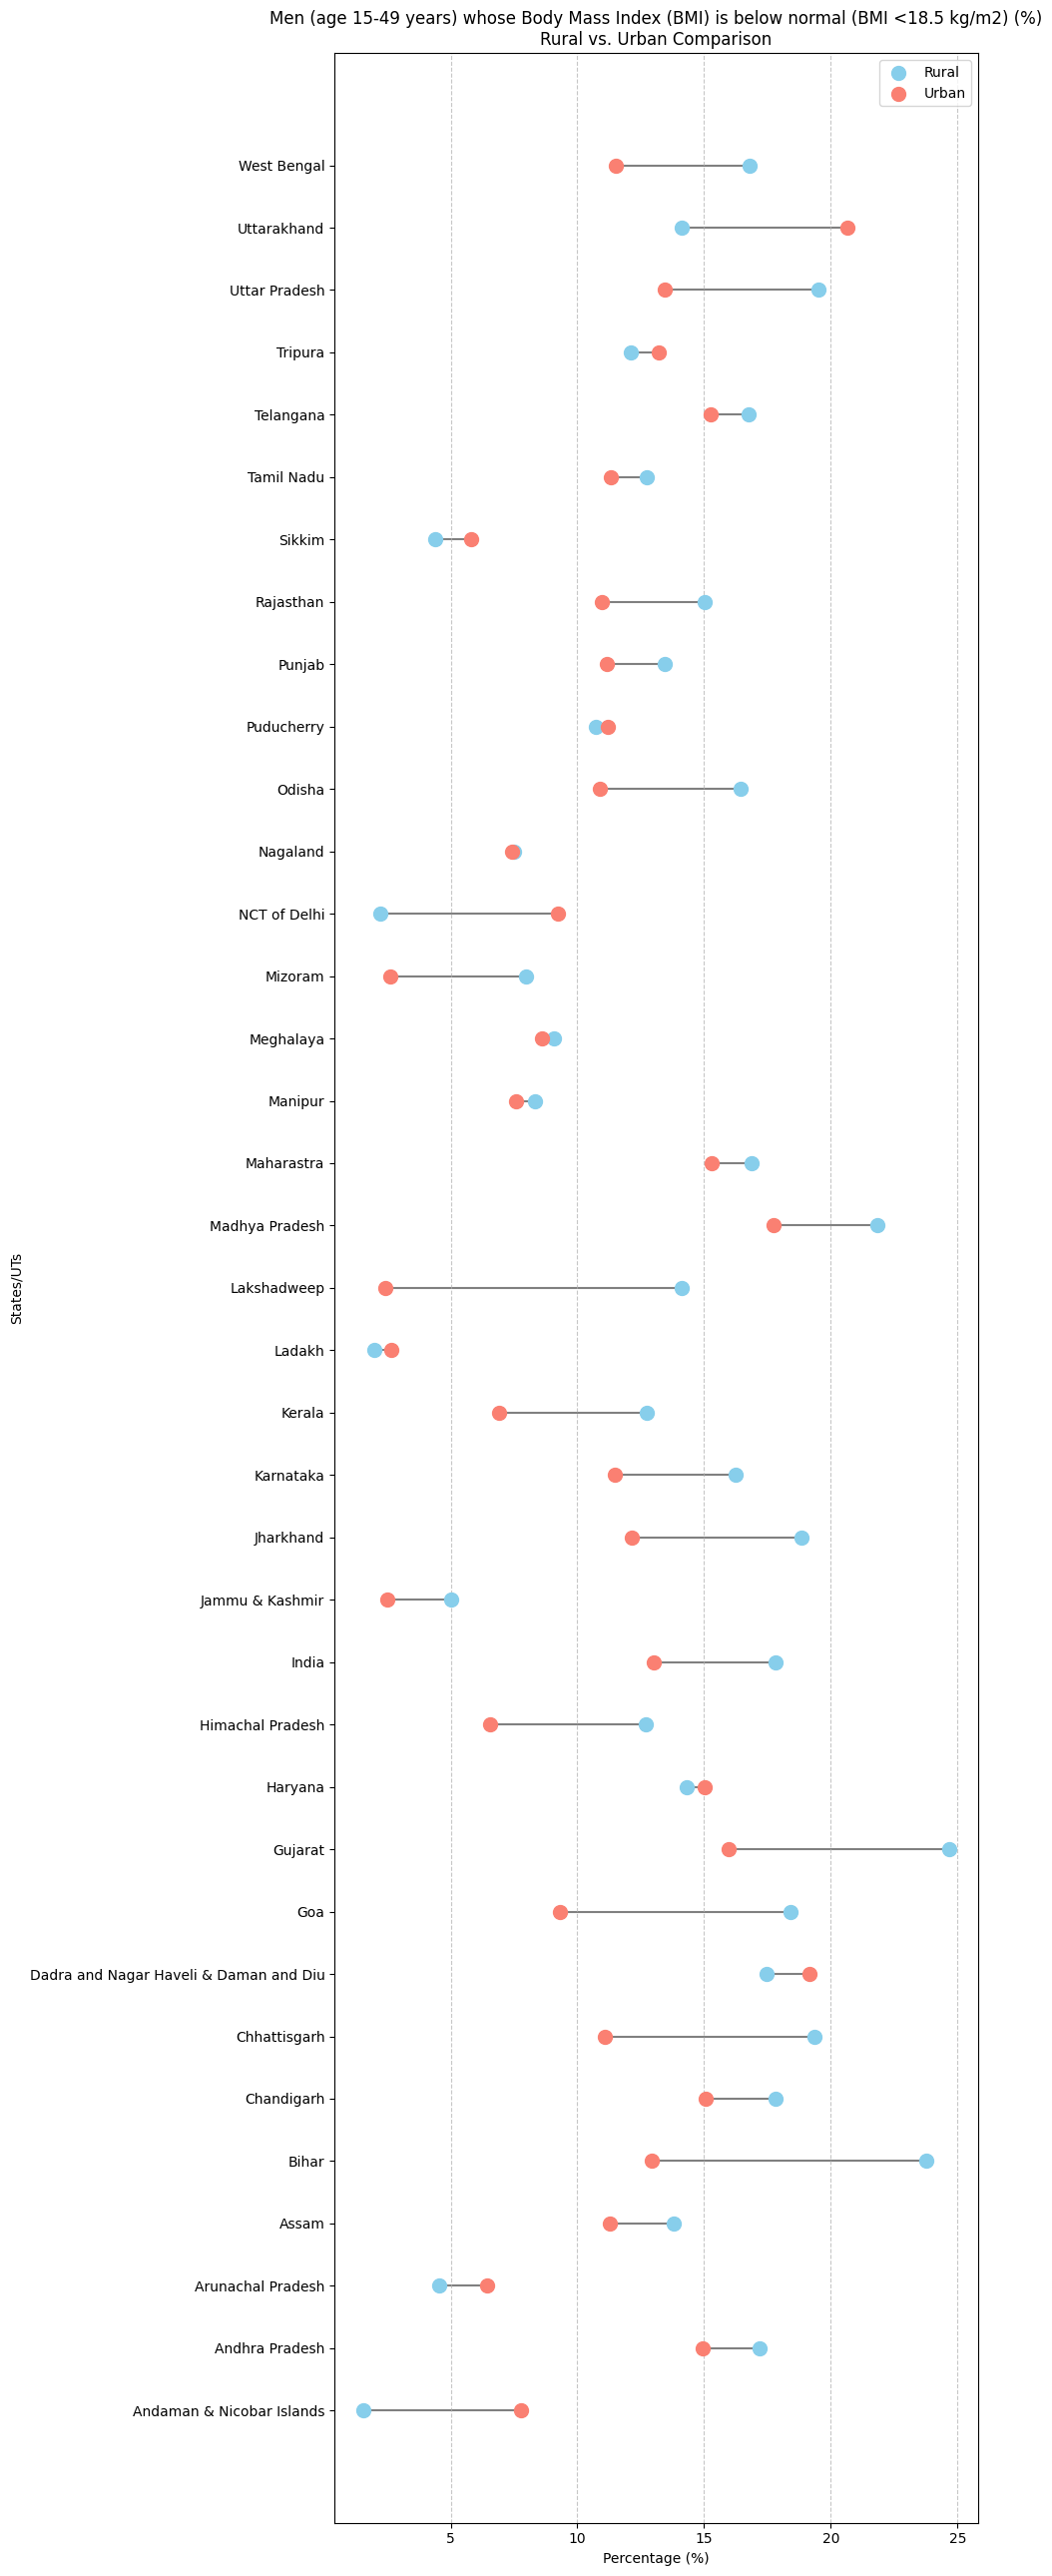

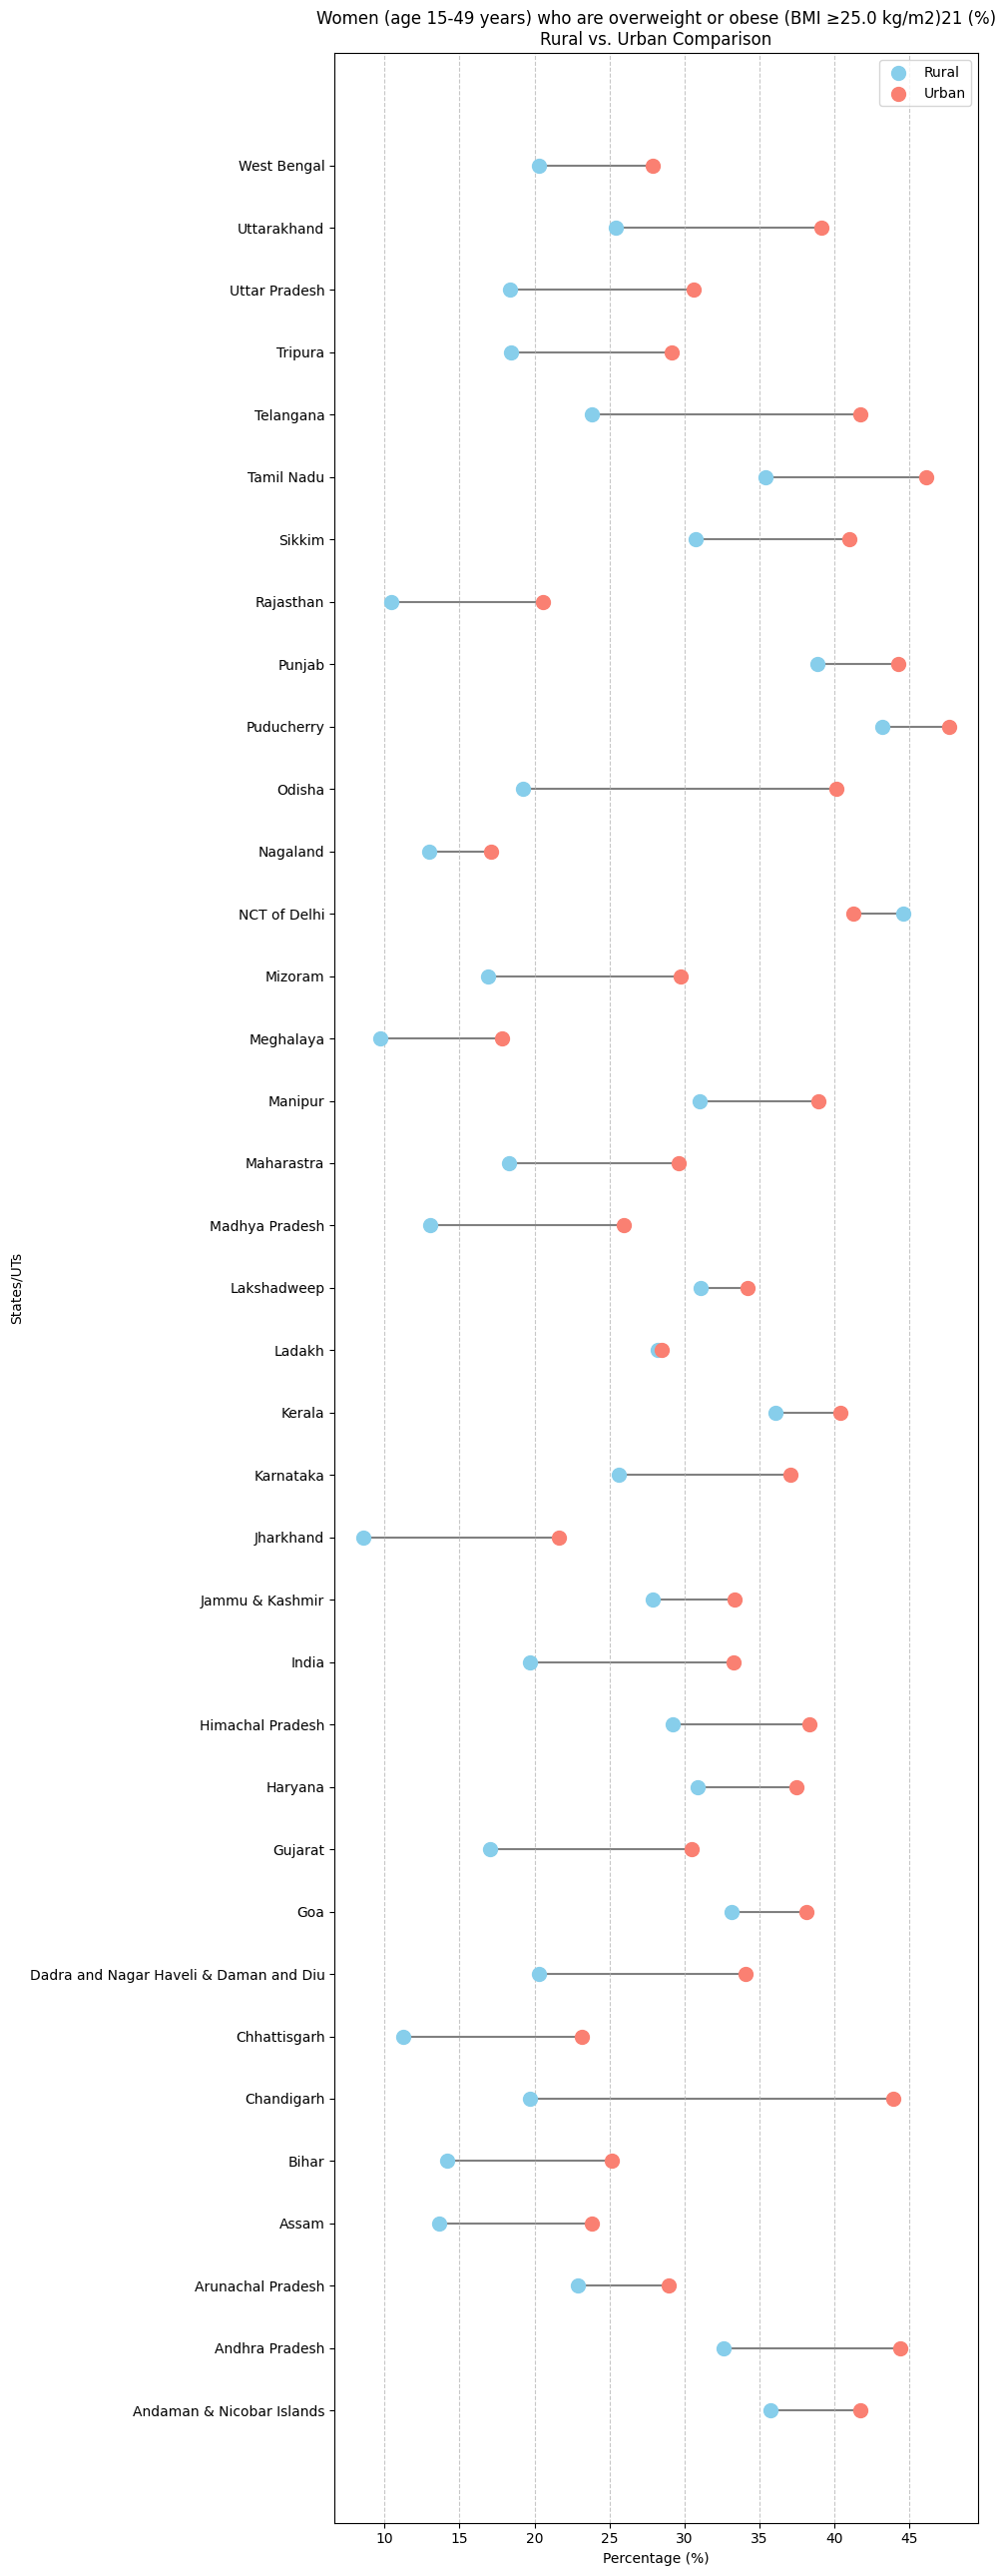

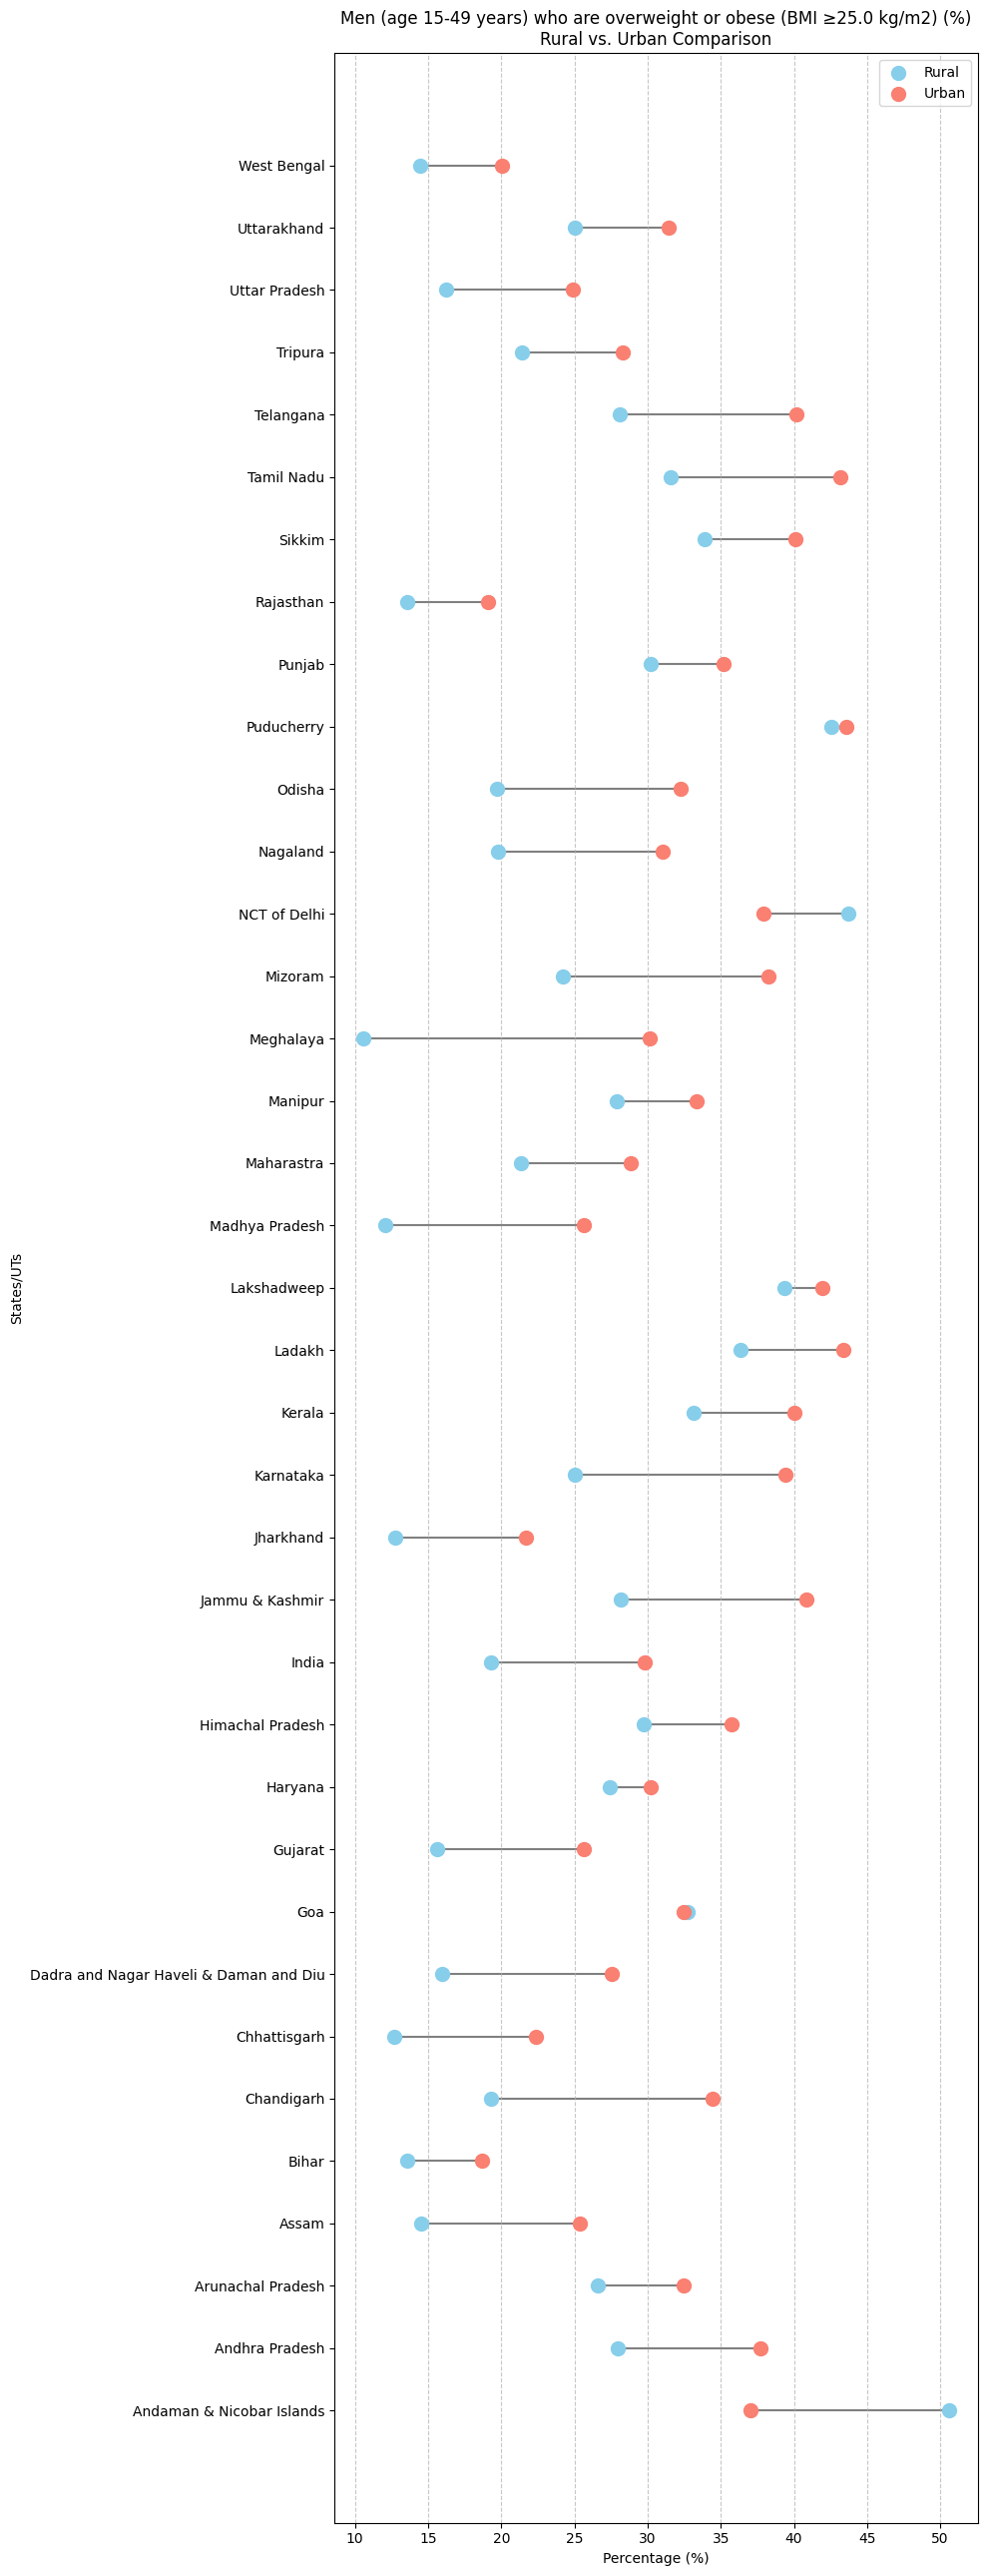

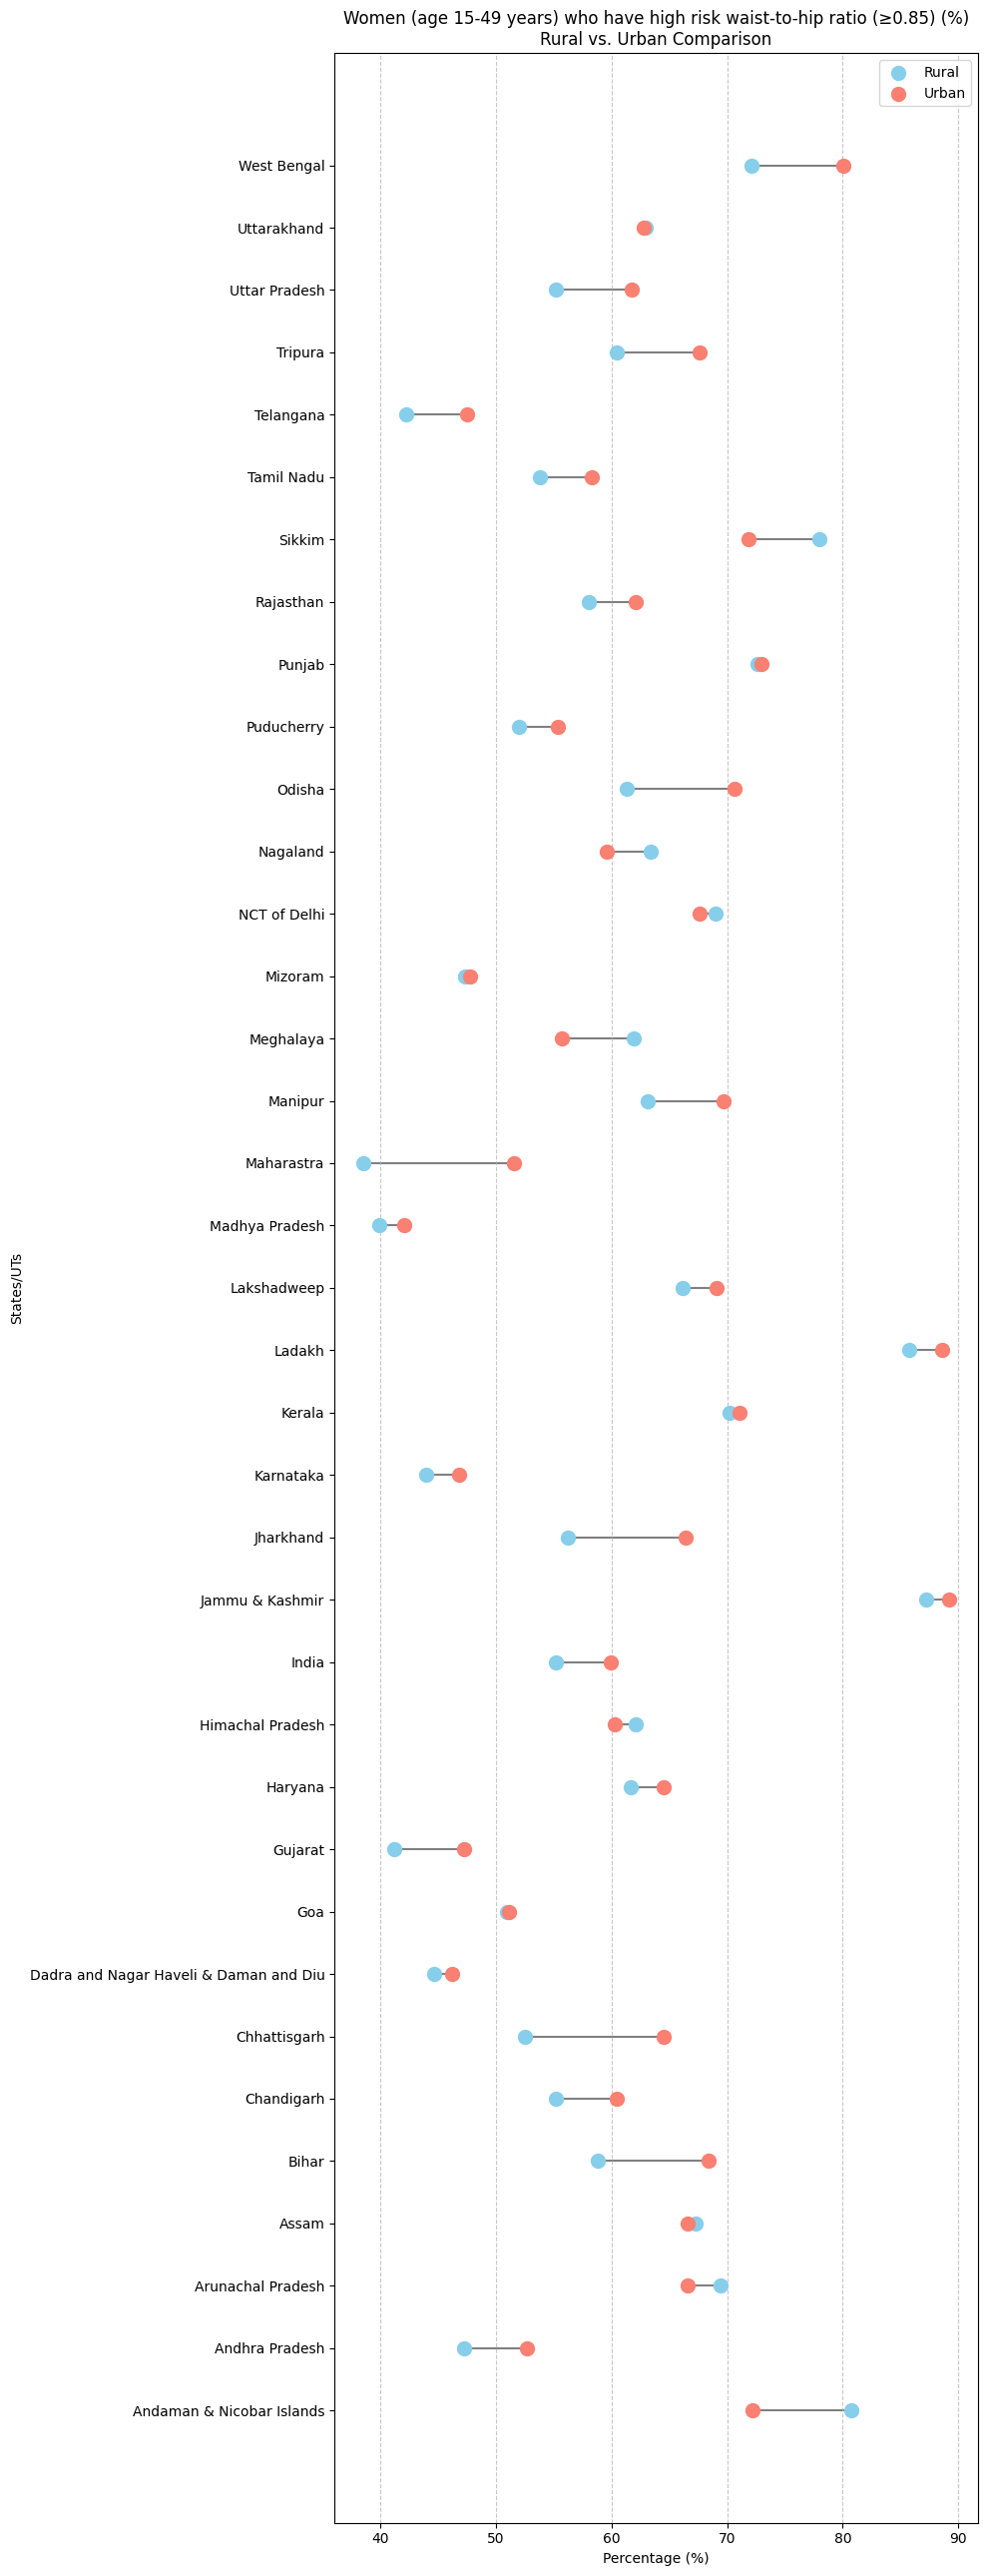

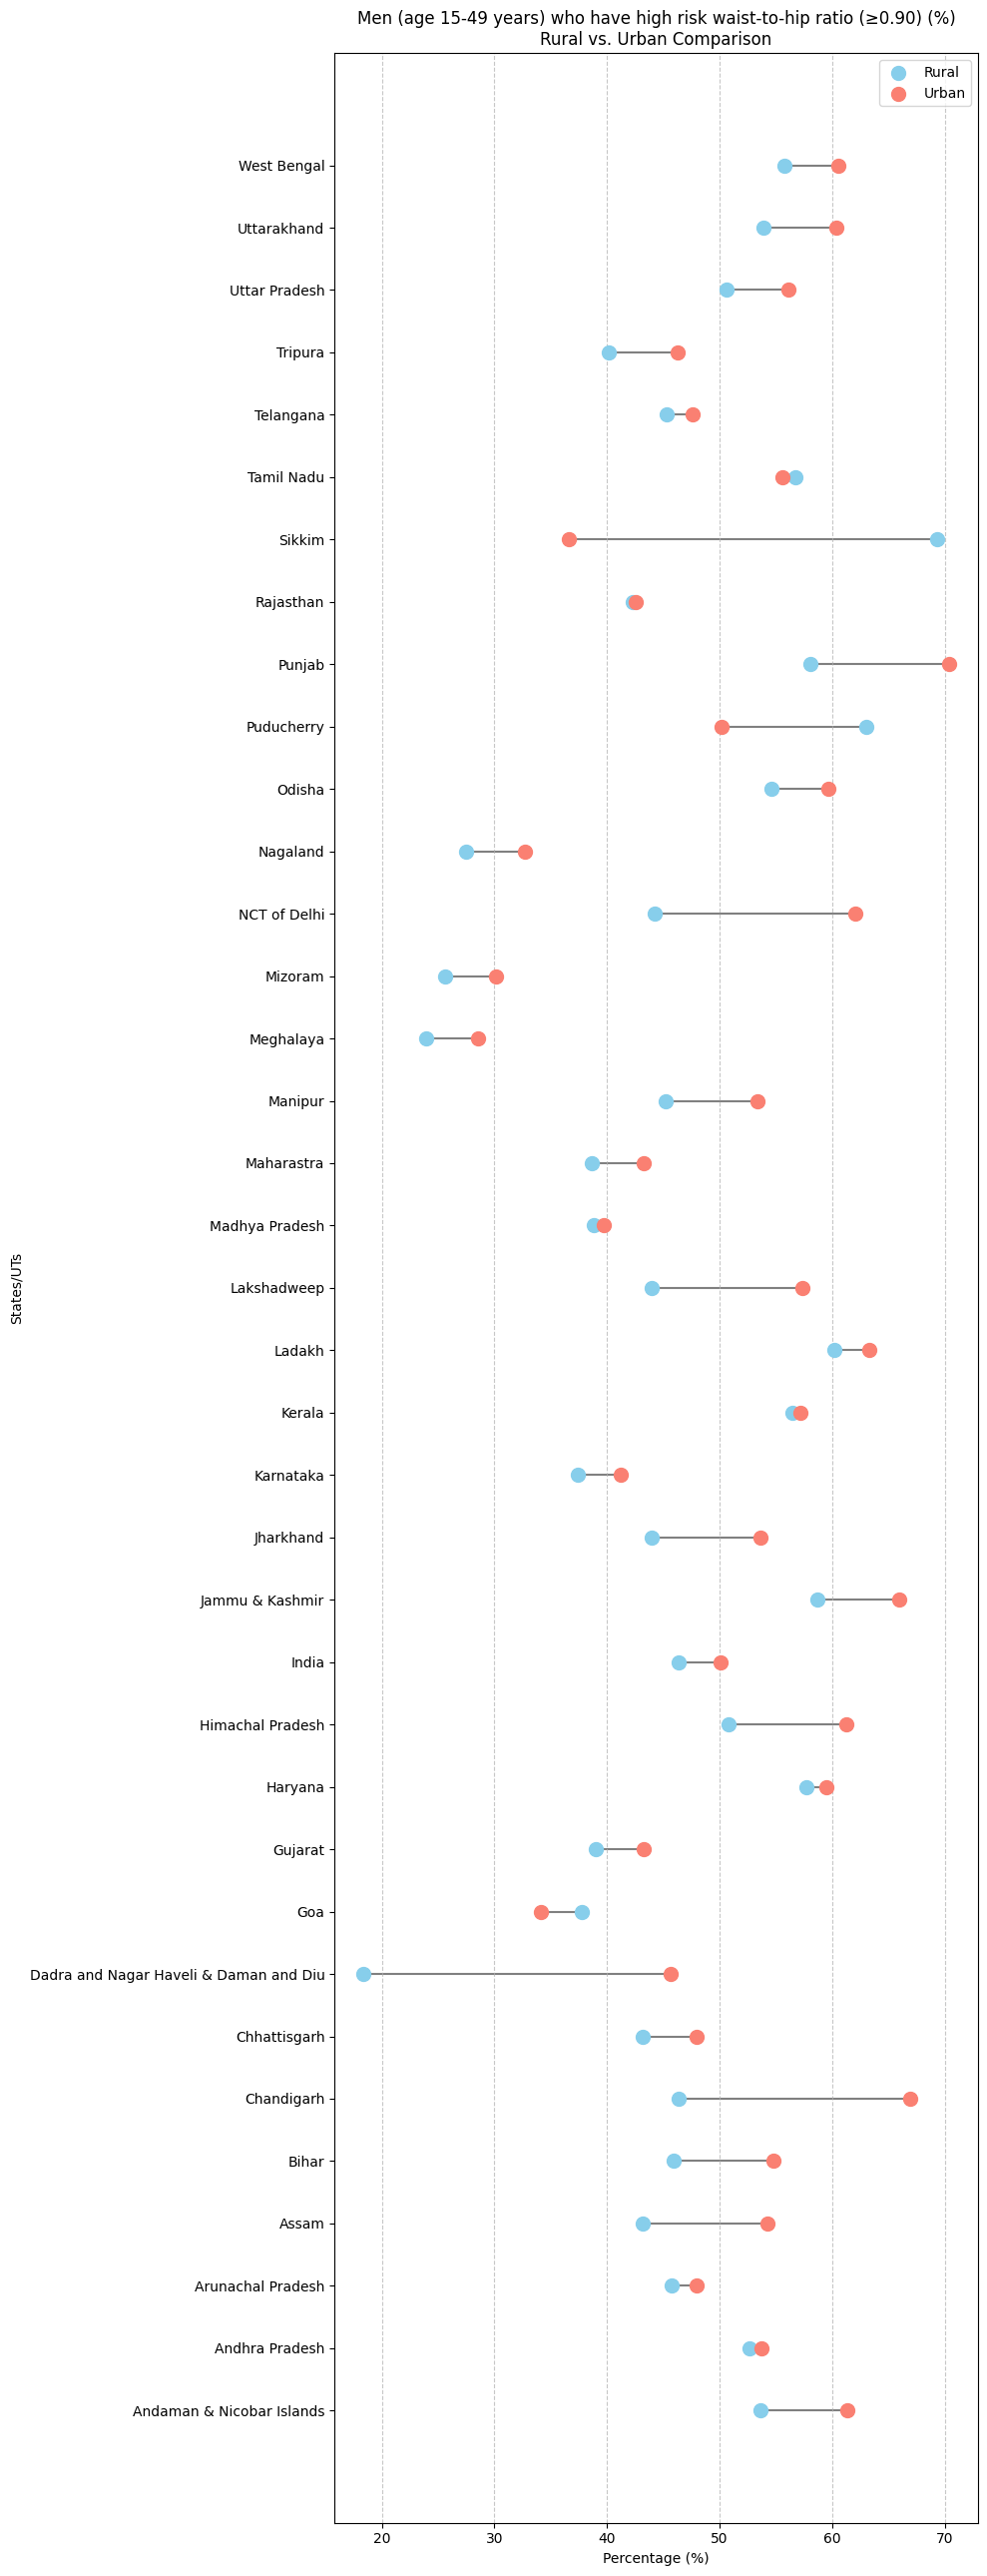

In [29]:
bmi_waist_hip_cols = [
    'Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)',
    'Men (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)',
    'Women (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2)21 (%)',
    'Men (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2) (%)',
    'Women (age 15-49 years) who have high risk waist-to-hip ratio (≥0.85) (%)',
    'Men (age 15-49 years) who have high risk waist-to-hip ratio (≥0.90) (%)',
]

# Filter out 'Total' and pivot the data for easy plotting
# We want 'States/UTs' as index, columns as Rural/Urban, and values as percentages.
df_filtered = df[df['Area'].isin(['Rural', 'Urban'])].copy()

# Iterate through each column and create a dumbbell plot
for col in bmi_waist_hip_cols:
    if col in df_filtered.columns:
        # Pivot the data to get Rural and Urban values side-by-side for each state
        plot_df = df_filtered.pivot_table(index='States/UTs', columns='Area', values=col)
        plot_df = plot_df.dropna() # Drop any states that don't have both Rural and Urban data

        if not plot_df.empty:
            states = plot_df.index
            rural_values = plot_df['Rural']
            urban_values = plot_df['Urban']

            plt.figure(figsize=(10, len(states) * 0.7)) # Adjust figure size dynamically
            
            # Plot the lines connecting Rural and Urban points
            for i in range(len(states)):
                plt.plot([rural_values.iloc[i], urban_values.iloc[i]], [states[i], states[i]],
                         color='gray', linestyle='-', linewidth=1.5, zorder=1)
            
            # Plot Rural points
            plt.scatter(rural_values, states, color='skyblue', s=100, label='Rural', zorder=2)
            # Plot Urban points
            plt.scatter(urban_values, states, color='salmon', s=100, label='Urban', zorder=2)

            plt.xlabel('Percentage (%)')
            plt.ylabel('States/UTs')
            plt.title(f'{col}\nRural vs. Urban Comparison')
            plt.legend()
            plt.grid(axis='x', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No valid data to plot for '{col}' after filtering.")
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame. Skipping plot.")


In [30]:
female_health_cols_higher_is_better = [
    'Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%)',
    'Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%)',
    'Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%)',
    'Women (age 15-49 years) who have comprehensive knowledge24 of HIV/AIDS (%)',
    'Women (age 15-49 years) who know that consistent condom use can reduce the chance of getting HIV/AIDS (%)'
]

female_health_cols_lower_is_better = [
    'Non-pregnant women age 15-49 years who are anaemic (<12.0 g/dl)22 (%)',
    'Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)',
    'All women age 15-49 years who are anaemic22 (%)',
    'All women age 15-19 years who are anaemic22 (%) ',
    'Women age 15 years and above with high (141-160 mg/dl) Blood sugar level23 (%)',
    'Women age 15 years and above wih very high (>160 mg/dl) Blood sugar level23 (%)',
    'Women age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level or taking medicine to control blood sugar level23 (%)',
    'Women age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%)',
    'Women age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%)',
    'Women age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)'
]

male_health_cols_higher_is_better = [
    'Men (age 30-49 years)Ever undergone an oral cavity examination for oral cancer (%)',
    'Men (age 15-49 years) who have comprehensive knowledge24 of HIV/AIDS (%)',
    'Men (age 15-49 years) who know that consistent condom use can reduce the chance of getting HIV/AIDS (%)'
]

male_health_cols_lower_is_better = [
    'Men age 15-49 years who are anaemic (<13.0 g/dl)22 (%)',
    'Men age 15-19 years who are anaemic (<13.0 g/dl)22 (%)',
    'Men age 15 years and above wih high (141-160 mg/dl) Blood sugar level23 (%)',
    'Men (age 15 years and above wih  very high (>160 mg/dl) Blood sugar level23 (%)',
    'Men age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level  or taking medicine to control blood sugar level23 (%)',
    'Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%)',
    'Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ≥160 mm of Hg and/or Diastolic ≥100 mm of Hg) (%)',
    'Men age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)'
]

# Filter out 'Total' and keep only 'Rural' and 'Urban' areas
df_filtered_adult_health = df[df['Area'].isin(['Rural', 'Urban'])].copy()

# --- Calculate Female Health Score ---
female_transformed_df = pd.DataFrame(index=df_filtered_adult_health.index)
for col in female_health_cols_higher_is_better:
    if col in df_filtered_adult_health.columns:
        # Convert column to numeric, coercing errors to NaN
        female_transformed_df[col] = pd.to_numeric(df_filtered_adult_health[col], errors='coerce')
for col in female_health_cols_lower_is_better:
    if col in df_filtered_adult_health.columns:
        # Convert column to numeric, coercing errors to NaN, then transform
        female_transformed_df[col] = 100 - pd.to_numeric(df_filtered_adult_health[col], errors='coerce')

# Only include columns that actually exist in the original DataFrame for mean calculation
existing_female_cols = [col for col in female_transformed_df.columns if col in df_filtered_adult_health.columns]
if existing_female_cols:
    df_filtered_adult_health['Female Health Score'] = female_transformed_df[existing_female_cols].mean(axis=1)
else:
    df_filtered_adult_health['Female Health Score'] = np.nan
    print("Warning: No valid female health columns found to calculate 'Female Health Score'.")


# --- Calculate Male Health Score ---
male_transformed_df = pd.DataFrame(index=df_filtered_adult_health.index)
for col in male_health_cols_higher_is_better:
    if col in df_filtered_adult_health.columns:
        # Convert column to numeric, coercing errors to NaN
        male_transformed_df[col] = pd.to_numeric(df_filtered_adult_health[col], errors='coerce')
for col in male_health_cols_lower_is_better:
    if col in df_filtered_adult_health.columns:
        # Convert column to numeric, coercing errors to NaN, then transform
        male_transformed_df[col] = 100 - pd.to_numeric(df_filtered_adult_health[col], errors='coerce')

# Only include columns that actually exist in the original DataFrame for mean calculation
existing_male_cols = [col for col in male_transformed_df.columns if col in df_filtered_adult_health.columns]
if existing_male_cols:
    df_filtered_adult_health['Male Health Score'] = male_transformed_df[existing_male_cols].mean(axis=1)
else:
    df_filtered_adult_health['Male Health Score'] = np.nan
    print("Warning: No valid male health columns found to calculate 'Male Health Score'.")


# --- Prepare data for grouped bar charts ---
# Pivot the DataFrame to get 'Female Health Score' and 'Male Health Score' for Rural and Urban side-by-side
plot_female_df = df_filtered_adult_health.pivot_table(index='States/UTs', columns='Area', values='Female Health Score').dropna()
plot_male_df = df_filtered_adult_health.pivot_table(index='States/UTs', columns='Area', values='Male Health Score').dropna()

bar_width = 0.35
index = np.arange(len(plot_female_df.index))


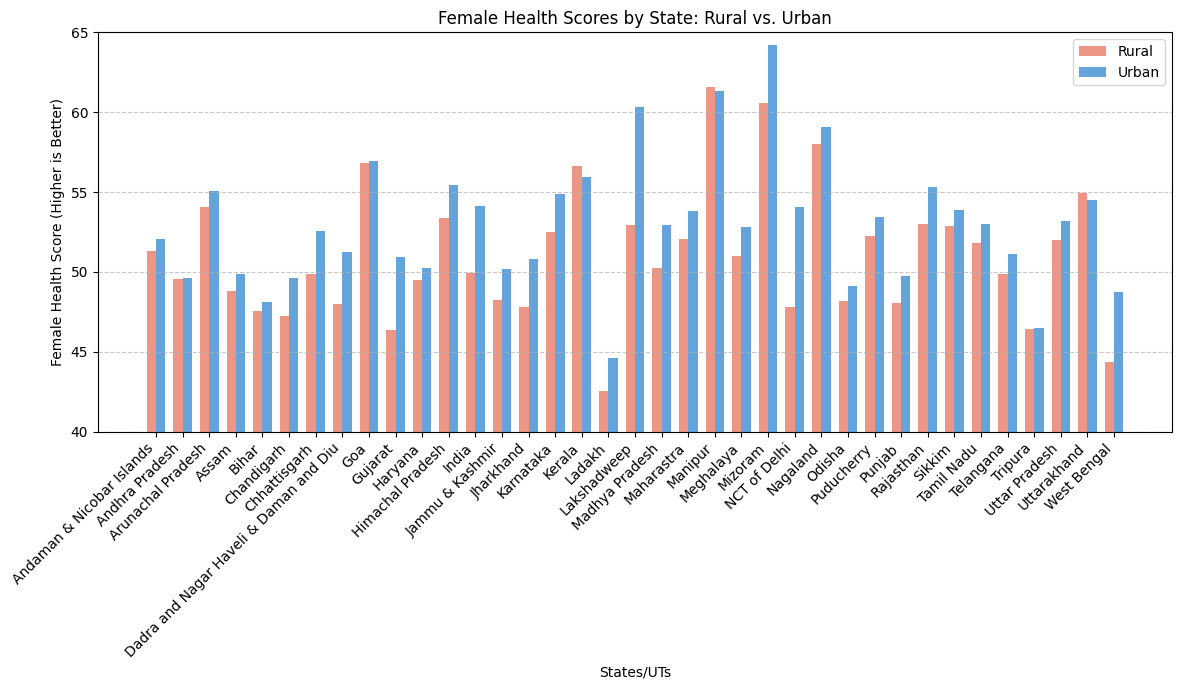

In [31]:
if not plot_female_df.empty:
    plt.figure(figsize=(12, 7))
    plt.bar(index - bar_width/2, plot_female_df['Rural'], bar_width, label='Rural', color="#EE9686") # Tomato red
    plt.bar(index + bar_width/2, plot_female_df['Urban'], bar_width, label='Urban', color="#64A4DA") # Steel blue

    plt.xlabel('States/UTs')
    plt.ylabel('Female Health Score (Higher is Better)')
    plt.title('Female Health Scores by State: Rural vs. Urban')
    plt.xticks(index, plot_female_df.index, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(40, 65)
    plt.tight_layout()
    plt.show()
else:
    print("No valid female health data to plot.")


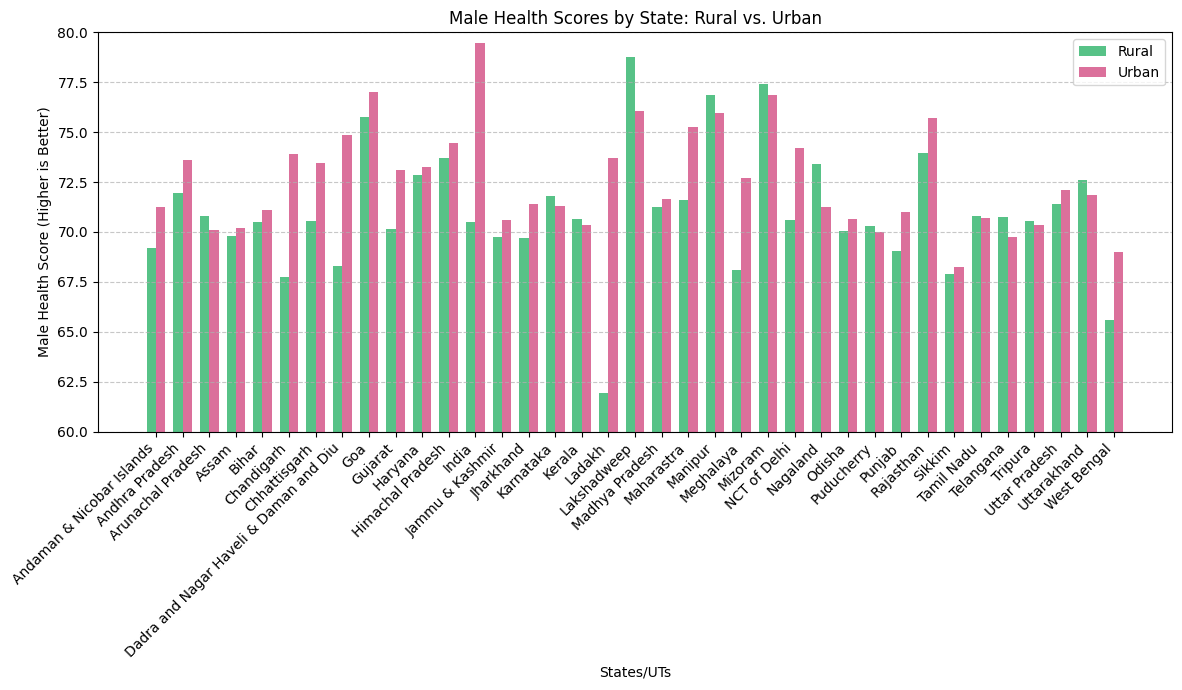

In [32]:
if not plot_male_df.empty:
    plt.figure(figsize=(12, 7))
    plt.bar(index - bar_width/2, plot_male_df['Rural'], bar_width, label='Rural', color="#57C287") # Medium sea green
    plt.bar(index + bar_width/2, plot_male_df['Urban'], bar_width, label='Urban', color="#DB709B") # Medium purple

    plt.xlabel('States/UTs')
    plt.ylabel('Male Health Score (Higher is Better)')
    plt.title('Male Health Scores by State: Rural vs. Urban')
    plt.xticks(index, plot_male_df.index, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(60, 80)
    plt.tight_layout()
    plt.show()
else:
    print("No valid male health data to plot.")

C:\Users\Gokul\AppData\Local\Temp\ipykernel_27912\1002613083.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Area', y='Women_Empowerment_Safety_Score', data=df_women_data,


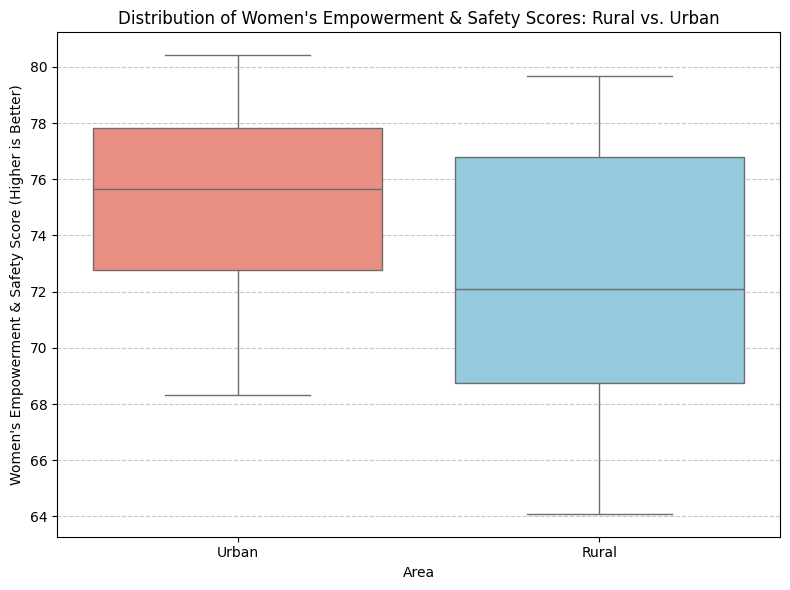

In [33]:
# Define columns for Women's Empowerment & Safety
# A higher percentage is better for these:
women_empowerment_cols_higher_is_better = [
    'Currently married women (age 15-49 years) who usually participate in three household decisions25 (%)',
    'Women (age 15-49 years) who worked in the last 12 months and were paid in cash (%)',
    'Women (age 15-49 years) owning a house and/or land (alone or jointly with others) (%)',
    'Women (age 15-49 years) having a bank or savings account that they themselves use (%)',
    'Women (age 15-49 years) having a mobile phone that they themselves use (%)',
    'Women age 15-24 years who use hygienic methods of protection during their menstrual period26 (%)'
]

# A lower percentage is better for these (violence indicators):
women_empowerment_cols_lower_is_better = [
    'Ever-married women age 18-49 years who have ever experienced spousal violence27 (%)',
    'Ever-married women age 18-49 years who have experienced physical violence during any pregnancy (%)',
    'Young women age 18-29 years who experienced sexual violence by age 18 (%)'
]

# Filter out 'Total' and keep only 'Rural' and 'Urban' areas
df_women_data = df[df['Area'].isin(['Rural', 'Urban'])].copy()

# Apply transformations for 'lower is better' columns to make 'higher is better'
transformed_women_df = pd.DataFrame(index=df_women_data.index)

# Process 'higher is better' columns
for col in women_empowerment_cols_higher_is_better:
    if col in df_women_data.columns:
        transformed_women_df[col] = pd.to_numeric(df_women_data[col], errors='coerce')

# Process 'lower is better' columns (subtract from 100)
for col in women_empowerment_cols_lower_is_better:
    if col in df_women_data.columns:
        transformed_women_df[col] = 100 - pd.to_numeric(df_women_data[col], errors='coerce')

# Calculate the overall Women's Empowerment & Safety Score
# Combine all transformed columns to calculate the mean score
all_women_score_cols = [col for col in transformed_women_df.columns if col in df_women_data.columns]
if all_women_score_cols:
    df_women_data['Women_Empowerment_Safety_Score'] = transformed_women_df[all_women_score_cols].mean(axis=1)
else:
    df_women_data['Women_Empowerment_Safety_Score'] = np.nan
    print("Warning: No valid women's empowerment/safety columns found to calculate score.")


# --- Plotting with Box Plot for Overall Rural vs Urban Distribution ---

# Ensure there's data to plot after potential NaNs
if not df_women_data['Women_Empowerment_Safety_Score'].dropna().empty:
    plt.figure(figsize=(8, 6))
    
    # Use seaborn boxplot to show distribution of scores by Area
    # This will plot the distribution of all Rural scores and all Urban scores across states.
    sns.boxplot(x='Area', y='Women_Empowerment_Safety_Score', data=df_women_data,
                palette={'Rural': 'skyblue', 'Urban': 'salmon'})

    plt.xlabel('Area')
    plt.ylabel('Women\'s Empowerment & Safety Score (Higher is Better)')
    plt.title('Distribution of Women\'s Empowerment & Safety Scores: Rural vs. Urban')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No valid women's empowerment/safety data to plot after filtering and transformation.")

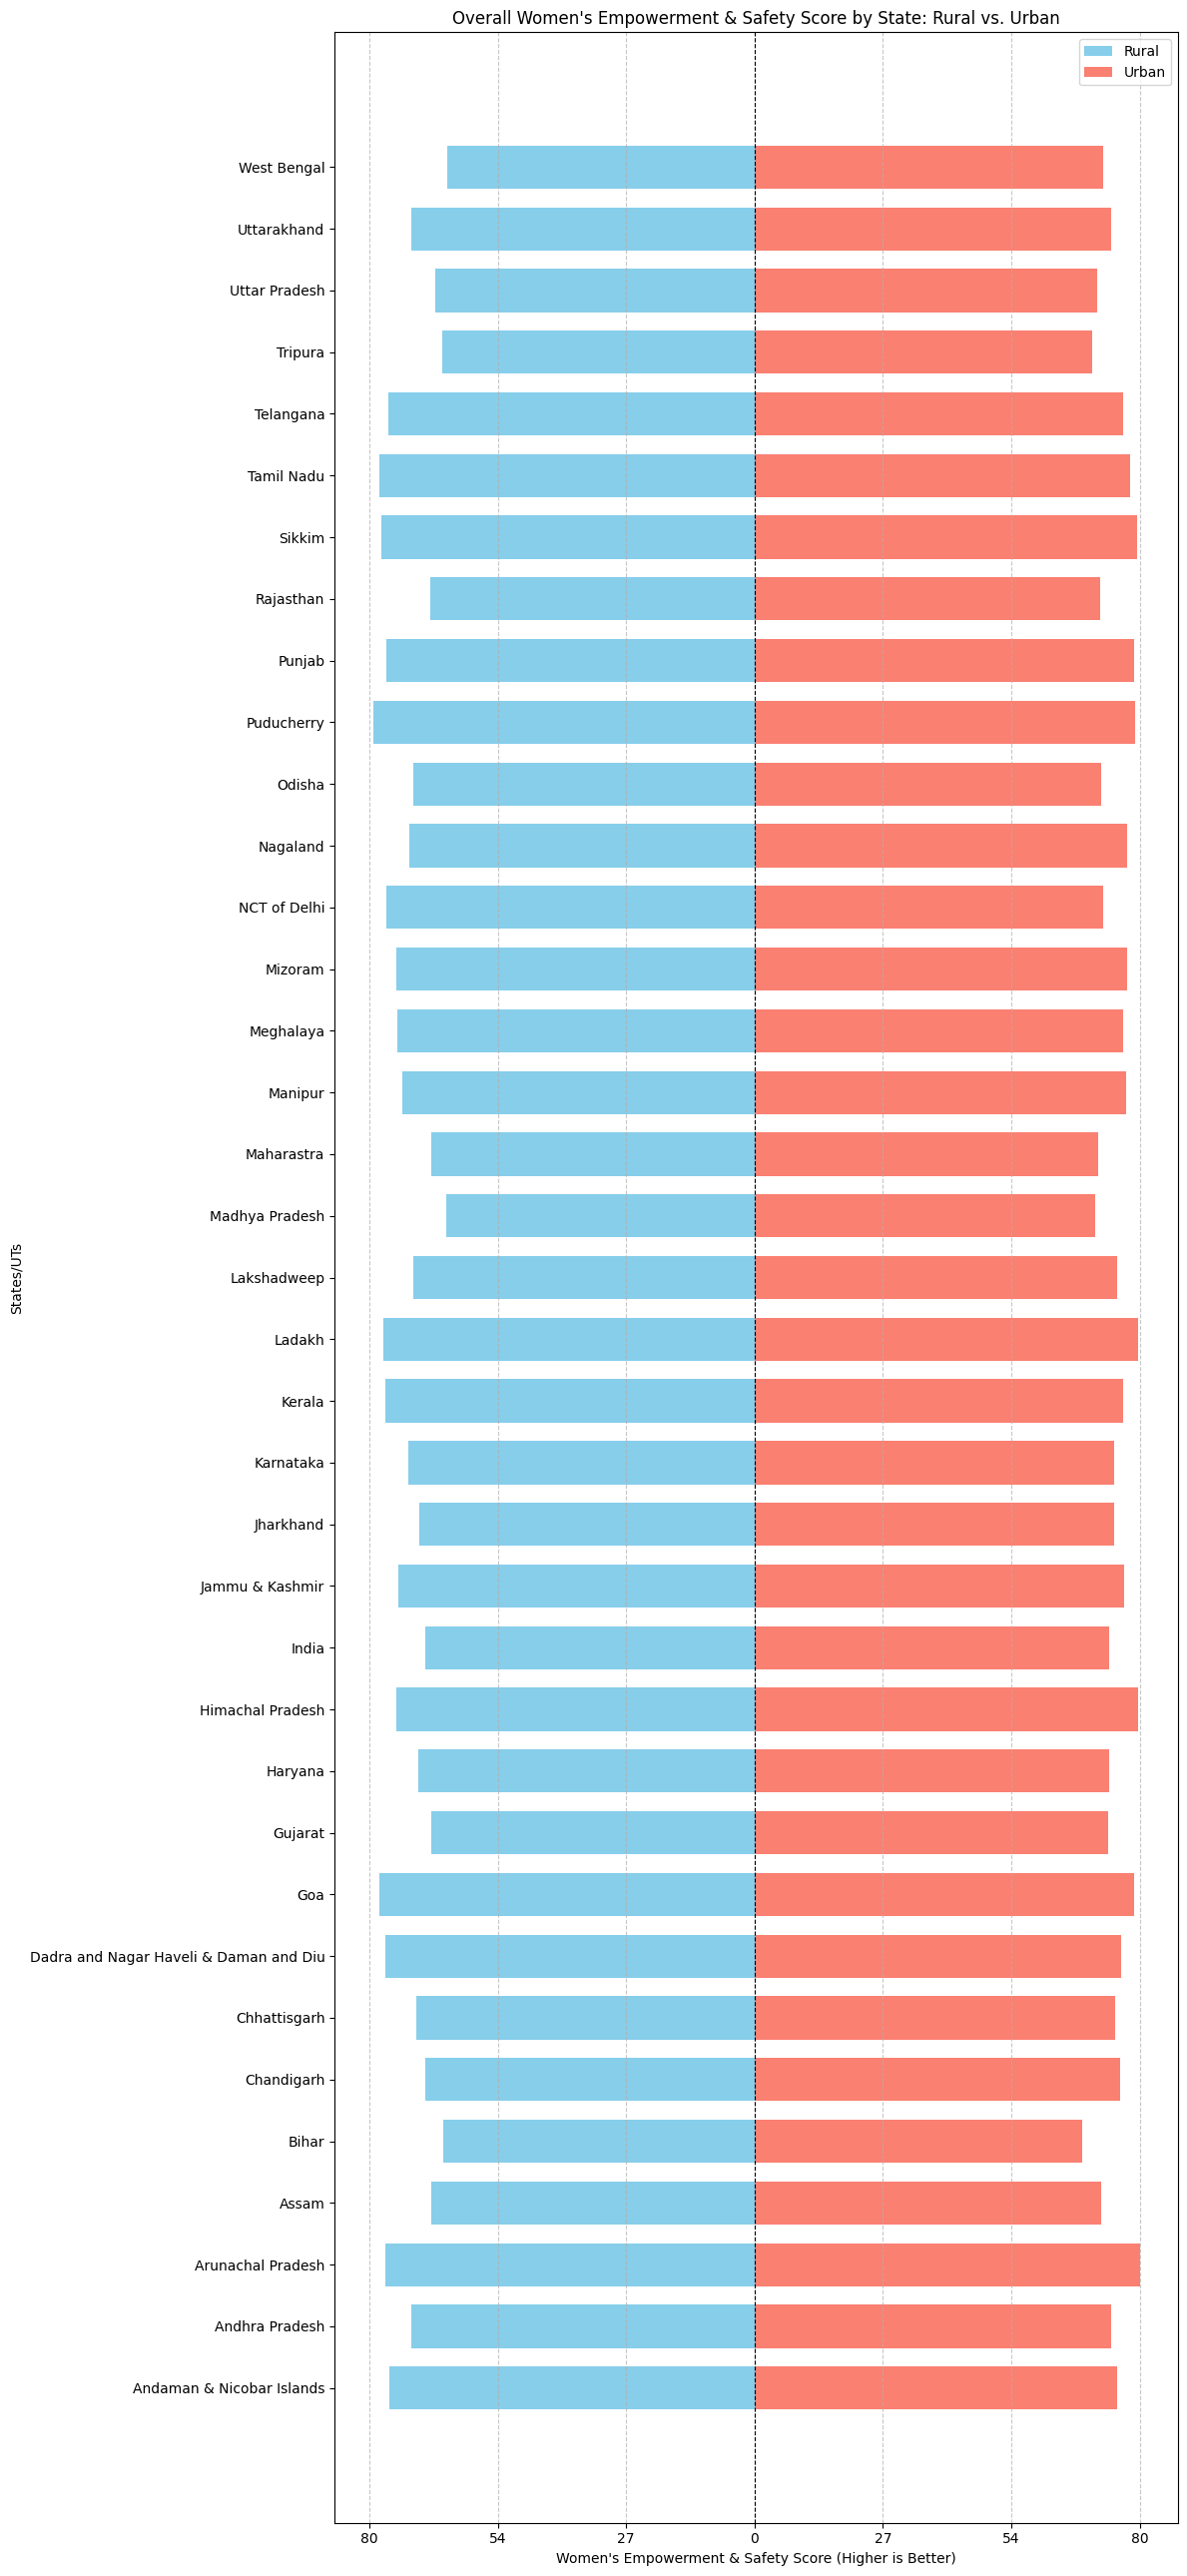

In [34]:
women_empowerment_cols_higher_is_better = [
    'Currently married women (age 15-49 years) who usually participate in three household decisions25 (%)',
    'Women (age 15-49 years) who worked in the last 12 months and were paid in cash (%)',
    'Women (age 15-49 years) owning a house and/or land (alone or jointly with others) (%)',
    'Women (age 15-49 years) having a bank or savings account that they themselves use (%)',
    'Women (age 15-49 years) having a mobile phone that they themselves use (%)',
    'Women age 15-24 years who use hygienic methods of protection during their menstrual period26 (%)'
]

# A lower percentage is better for these (violence indicators):
women_empowerment_cols_lower_is_better = [
    'Ever-married women age 18-49 years who have ever experienced spousal violence27 (%)',
    'Ever-married women age 18-49 years who have experienced physical violence during any pregnancy (%)',
    'Young women age 18-29 years who experienced sexual violence by age 18 (%)'
]

# Filter out 'Total' and keep only 'Rural' and 'Urban' areas
df_women_data = df[df['Area'].isin(['Rural', 'Urban'])].copy()

# Apply transformations for 'lower is better' columns to make 'higher is better'
transformed_women_df = pd.DataFrame(index=df_women_data.index)

# Process 'higher is better' columns
for col in women_empowerment_cols_higher_is_better:
    if col in df_women_data.columns:
        transformed_women_df[col] = pd.to_numeric(df_women_data[col], errors='coerce')

# Process 'lower is better' columns (subtract from 100)
for col in women_empowerment_cols_lower_is_better:
    if col in df_women_data.columns:
        transformed_women_df[col] = 100 - pd.to_numeric(df_women_data[col], errors='coerce')

# Calculate the overall Women's Empowerment & Safety Score
# Combine all transformed columns to calculate the mean score
all_women_score_cols = [col for col in transformed_women_df.columns if col in df_women_data.columns]
if all_women_score_cols:
    df_women_data['Women_Empowerment_Safety_Score'] = transformed_women_df[all_women_score_cols].mean(axis=1)
else:
    df_women_data['Women_Empowerment_Safety_Score'] = np.nan
    print("Warning: No valid women's empowerment/safety columns found to calculate score.")


# --- Prepare data for Mirror Bar Chart ---
# Pivot the DataFrame to get 'Women_Empowerment_Safety_Score' for Rural and Urban side-by-side
plot_women_score_df = df_women_data.pivot_table(
    index='States/UTs',
    columns='Area',
    values='Women_Empowerment_Safety_Score'
).dropna()

# Check if plot_women_score_df is not empty before plotting
if not plot_women_score_df.empty:
    plt.figure(figsize=(12, max(6, len(plot_women_score_df.index) * 0.7))) # Dynamic height
    
    states = plot_women_score_df.index
    rural_scores = plot_women_score_df['Rural']
    urban_scores = plot_women_score_df['Urban']

    # Create the mirror effect: Rural bars extend left (negative x-values)
    # Ensure scores are numeric before plotting
    plt.barh(states, -pd.to_numeric(rural_scores, errors='coerce'), color='skyblue', label='Rural', height=0.7)
    # Urban bars extend right (positive x-values)
    plt.barh(states, pd.to_numeric(urban_scores, errors='coerce'), color='salmon', label='Urban', height=0.7)

    # --- Customizing the plot for mirror bar chart ---
    plt.xlabel('Women\'s Empowerment & Safety Score (Higher is Better)')
    plt.ylabel('States/UTs')
    plt.title('Overall Women\'s Empowerment & Safety Score by State: Rural vs. Urban')
    plt.legend()
    
    # Adjust x-axis ticks to show absolute values for easier interpretation
    # Find the maximum absolute score to set symmetric x-limits
    max_score = max(rural_scores.abs().max(), urban_scores.abs().max())
    # Create symmetrical ticks around 0
    tick_values = np.linspace(-max_score, max_score, num=7) # Adjust num for more/fewer ticks
    plt.xticks(ticks=tick_values, labels=[f'{abs(x):.0f}' for x in tick_values])
    
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--') # Central line
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No valid women's empowerment/safety data to plot after filtering and transformation.")

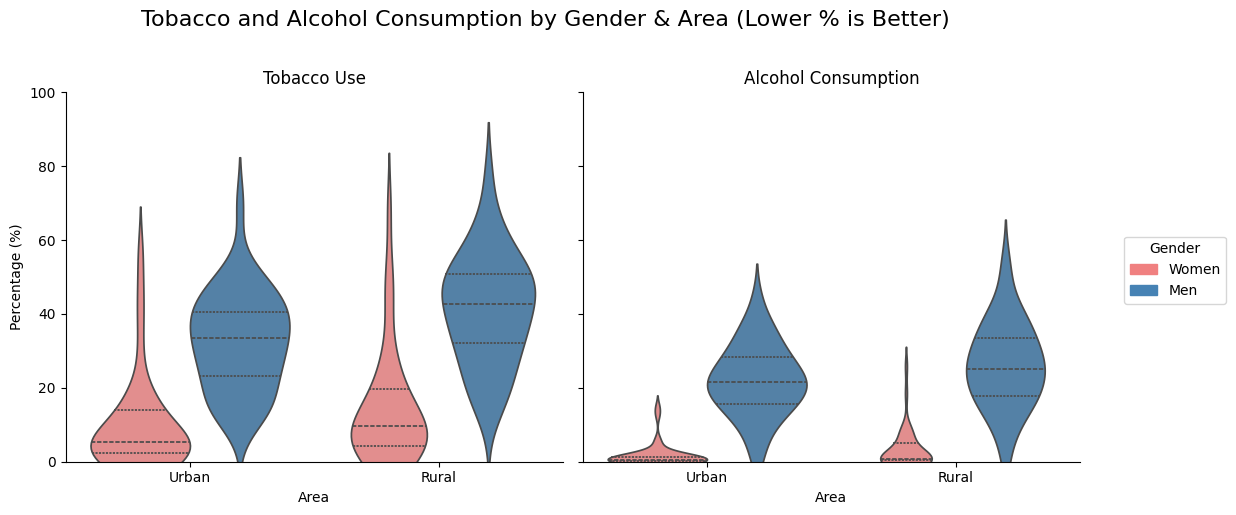

In [35]:
# Define the columns for tobacco and alcohol consumption
consumption_cols = [
    'Women age 15 years and above who use any kind of tobacco (%)',
    'Men age 15 years and above who use any kind of tobacco (%)',
    'Women age 15 years and above who consume alcohol (%)',
    'Men age 15 years and above who consume alcohol (%)'
]

# Filter out 'Total' and keep only 'Rural' and 'Urban' areas
df_consumption_data = df[df['Area'].isin(['Rural', 'Urban'])].copy()

# Melt the DataFrame to a long format
# This transforms the 'wide' format (each consumption type as a column)
# into a 'long' format (a single 'Consumption_Type' column, and 'Percentage' column)
df_melted = df_consumption_data.melt(
    id_vars=['States/UTs', 'Area'], # Columns to keep as identifiers
    value_vars=consumption_cols, # Columns to melt
    var_name='Consumption_Type', # New column for the melted column names
    value_name='Percentage' # New column for the values
)

# Introduce 'Gender' and 'Substance' columns for better grouping
def extract_gender_substance(consumption_type):
    if 'Women' in consumption_type:
        gender = 'Women'
    elif 'Men' in consumption_type:
        gender = 'Men'
    else:
        gender = 'Unknown' # Fallback

    if 'tobacco' in consumption_type.lower():
        substance = 'Tobacco Use'
    elif 'alcohol' in consumption_type.lower():
        substance = 'Alcohol Consumption'
    else:
        substance = 'Other' # Fallback
    return gender, substance

df_melted[['Gender', 'Substance']] = df_melted['Consumption_Type'].apply(
    lambda x: pd.Series(extract_gender_substance(x))
)

# Plotting with a FacetGrid (Small Multiples) of Violin Plots
# This allows grouping by Substance (Tobacco/Alcohol) in columns, and comparing Rural/Urban/Gender within each.

g = sns.catplot(
    data=df_melted,
    x='Area', # 'Rural' and 'Urban' on the x-axis for comparison
    y='Percentage', # The consumption percentage on the y-axis
    col='Substance', # Separate plots for 'Tobacco Use' and 'Alcohol Consumption'
    hue='Gender', # Differentiate 'Men' and 'Women' within each Area
    kind='violin', # Use violin plot to visualize the distribution and density
    col_wrap=2, # Display 2 subplots per row
    palette={'Women': 'lightcoral', 'Men': 'steelblue'}, # Define colors for gender
    inner='quartile', # Show quartiles inside the violins
    height=5, aspect=1.1, # Adjust the height and aspect ratio of each subplot
    sharey=True, sharex=True,
    legend=False # Set sharey to True to make y-axis range same for all plots
)

# Customize subplot titles
for ax, substance_title in zip(g.axes.flat, g.col_names):
    ax.set_title(substance_title) # Titles will now be 'Tobacco Use' and 'Alcohol Consumption'

# Set overall axis labels and title for the entire figure
g.set_axis_labels("Area", "Percentage (%)")
g.fig.suptitle('Tobacco and Alcohol Consumption by Gender & Area (Lower % is Better)', y=1.02, fontsize=16)

# Set the explicit y-axis limits for all subplots if not automatically 0-100
g.set(ylim=(0, 100))
import matplotlib.patches as mpatches

handles = [
    mpatches.Patch(color='lightcoral', label='Women'),
    mpatches.Patch(color='steelblue', label='Men')
]

g.fig.legend(handles=handles, title='Gender', bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.tight_layout() # Adjust layout to prevent overlapping elements
plt.show()

In [37]:
df_women_data.columns.tolist()

['States/UTs',
 'Area',
 'Number of Households surveyed',
 'Number of Women age 15-49 years interviewed',
 'Number of Men age 15-54 years interviewed',
 'Female population age 6 years and above who ever attended school (%)',
 'Population below age 15 years (%)',
 ' Sex ratio of the total population (females per 1,000 males)',
 'Sex ratio at birth for children born in the last five years (females per 1,000 males)',
 'Children under age 5 years whose birth was registered with the civil authority (%)',
 'Deaths in the last 3 years registered with the civil authority (%)',
 'Population living in households with electricity (%)',
 'Population living in households with an improved drinking-water source1 (%)',
 'Population living in households that use an improved sanitation facility2 (%)',
 'Households using clean fuel for cooking3 (%)',
 'Households using iodized salt (%)',
 'Households with any usual member covered under a health insurance/financing scheme (%)',
 'Children age 5 years who 

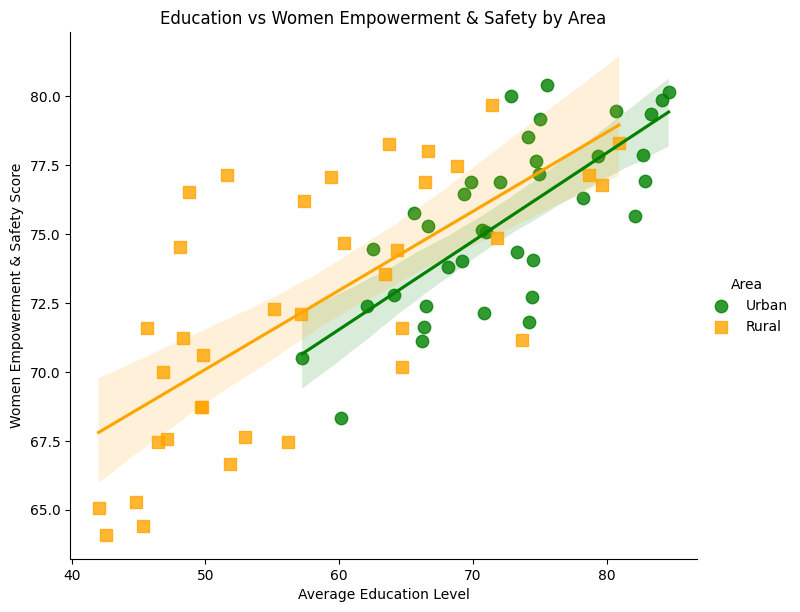

In [40]:
sns.lmplot(
    data=df_women_data,
    x='Education_Mean',
    y='Women_Empowerment_Safety_Score',
    hue='Area',
    palette={'Rural': 'orange', 'Urban': 'green'},
    height=6, aspect=1.2,
    markers=['o','s'],
    scatter_kws={'s':80}
)
plt.xlabel('Average Education Level')
plt.ylabel('Women Empowerment & Safety Score')
plt.title('Education vs Women Empowerment & Safety by Area')
plt.show()


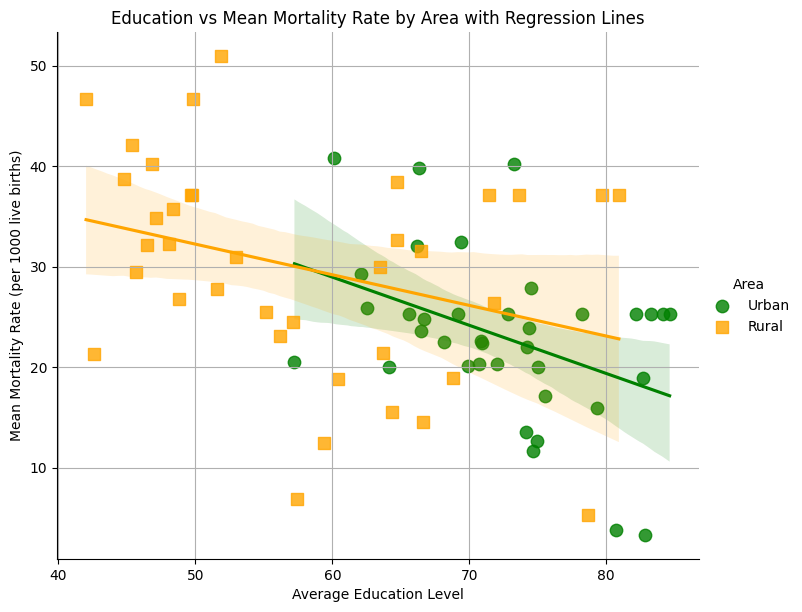

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    data=df_women_data,
    x='Education_Mean',
    y='Mean_Mortality',
    hue='Area',  # Separate regression lines for Rural and Urban
    palette={'Rural': 'orange', 'Urban': 'green'},
    height=6, aspect=1.2,
    markers=['o', 's'],  # Different marker for each area
    scatter_kws={'s':80}  # Size of scatter points
)

plt.xlabel('Average Education Level')
plt.ylabel('Mean Mortality Rate (per 1000 live births)')
plt.title('Education vs Mean Mortality Rate by Area with Regression Lines')
plt.grid(True)
plt.show()


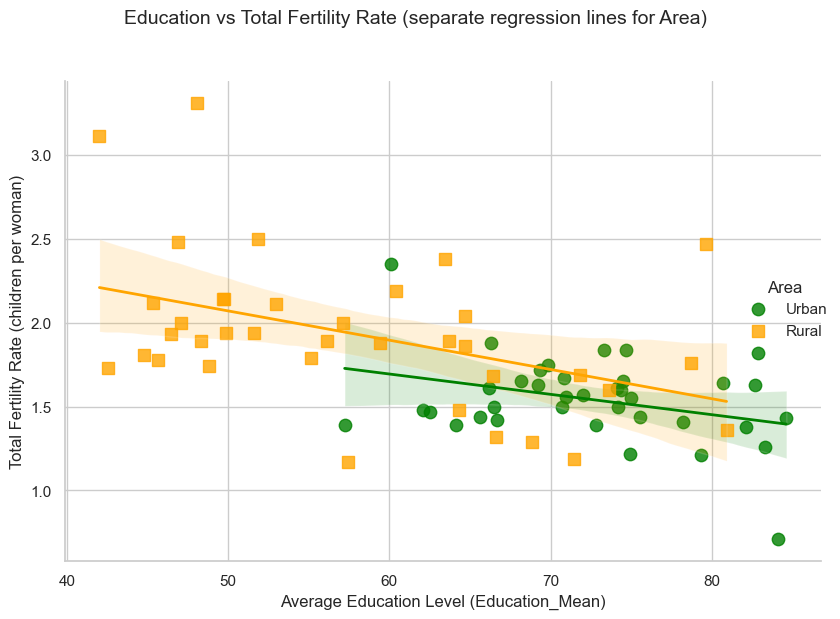

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Prepare dataframe (change df_women_data if your variable name is different) ---
df = df_women_data.copy()

x_col = 'Education_Mean'
y_col = 'Total Fertility Rate (number of children per woman)'
area_col = 'Area'  # expected values: 'Rural' and 'Urban'

# Coerce to numeric (turn '*' or other non-numeric into NaN)
df[x_col] = pd.to_numeric(df[x_col], errors='coerce')
df[y_col] = pd.to_numeric(df[y_col], errors='coerce')

# Keep only relevant columns and drop rows with missing values
df_sub = df[[x_col, y_col, area_col, 'States/UTs']].dropna(subset=[x_col, y_col]).copy()


# Optional: print simple summary stats

# Pearson correlation overall and by Area
overall_r = df_sub[x_col].corr(df_sub[y_col])

for name, group in df_sub.groupby(area_col):
    r = group[x_col].corr(group[y_col])

# --- Plot ---
sns.set(style='whitegrid')
palette = {'Rural': 'orange', 'Urban': 'green'}  # change colors if you like

g = sns.lmplot(
    data=df_sub,
    x=x_col,
    y=y_col,
    hue=area_col,
    palette=palette,
    markers=['o', 's'],
    scatter_kws={'s': 80, 'alpha': 0.8},
    line_kws={'linewidth': 2},
    ci=95,            # 95% confidence interval for the regression line
    height=6,
    aspect=1.25
)

# Labels and title
g.set_axis_labels('Average Education Level (Education_Mean)', 'Total Fertility Rate (children per woman)')
g.fig.suptitle('Education vs Total Fertility Rate (separate regression lines for Area)', y=1.03, fontsize=14)

# Annotate overall correlation on the plot
ax = g.axes[0,0]


plt.tight_layout()
plt.show()